In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)

In [8]:
df = pd.read_csv("C:/Users/PC/Desktop/UN/OpticsWork/codefiles/thesisreproduction/29-10-tests/data/29-10-conica-centroids.txt", delim_whitespace = True, header=None )    

C:\Users\PC\AppData\Local\Temp\ipykernel_1092\4129652503.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:/Users/PC/Desktop/UN/OpticsWork/codefiles/thesisreproduction/29-10-tests/data/29-10-conica-centroids.txt", delim_whitespace = True, header=None )


In [9]:
df.head(10)

,0,1,2
0,1,36.707184,242.374093
1,2,58.035874,151.958697
2,3,59.342646,175.818680
3,4,59.661530,196.490943
4,5,60.381818,218.452964
5,6,60.156397,239.797748
6,7,58.667089,263.270133
7,8,58.110722,286.398557
8,9,58.793473,309.486118
9,10,55.316792,331.458573


In [10]:
df.rename(columns={0:'pos', 2:'y', 1:'x'}, inplace=True)

In [11]:
df.head(10)

,pos,x,y
0,1,36.707184,242.374093
1,2,58.035874,151.958697
2,3,59.342646,175.818680
3,4,59.661530,196.490943
4,5,60.381818,218.452964
5,6,60.156397,239.797748
6,7,58.667089,263.270133
7,8,58.110722,286.398557
8,9,58.793473,309.486118
9,10,55.316792,331.458573


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pos     253 non-null    int64  
 1   x       253 non-null    float64
 2   y       253 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.1 KB


In [13]:
df.describe()

,pos,x,y
count,253.000000,253.000000,253.000000
mean,127.000000,238.124512,240.430290
std,73.179004,98.327675,98.250427
min,1.000000,36.707184,43.200702
25%,64.000000,154.168739,154.285957
50%,127.000000,238.992114,239.495320
75%,190.000000,323.751225,324.709807
max,253.000000,435.056633,444.665105


In [14]:
matA = np.zeros((480,480))

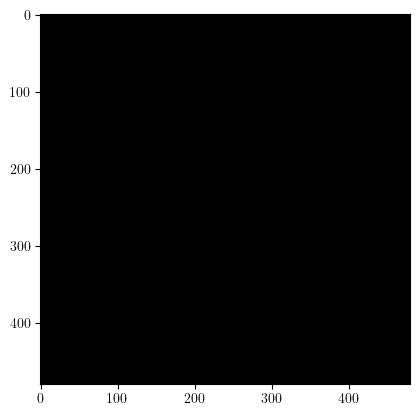

In [15]:
plt.imshow(matA, cmap="gray")

In [16]:
delta = 0.02 #There were 0.4 mm every 20 pixels. So, scaling, gives 0.02 mm per pixel
X = np.linspace(0, 480*delta + delta, 480)

In [17]:
np.max(X)

9.62

In [18]:
#The coordinates are in pixels, so they are integers and should be threated as that
#However, to be more exact, it will be better leave the x and y coordinates with decimals and then apply the 
#scale paratemer. So, this is only for give and idea, it is not correct to perform computations
df_img_pattern = np.floor(df).astype(int)

In [19]:
df_img_pattern.head(5)

,pos,x,y
0,1,36,242
1,2,58,151
2,3,59,175
3,4,59,196
4,5,60,218


In [20]:
df.head(5)

,pos,x,y
0,1,36.707184,242.374093
1,2,58.035874,151.958697
2,3,59.342646,175.818680
3,4,59.661530,196.490943
4,5,60.381818,218.452964


In [21]:
N = df.shape[0] #Number of centroids in the pattern
matA = np.zeros((480,480))

counter = 0 #Just to verify
for ii in range(0,N):
    matA[df_img_pattern["x"][ii]][df_img_pattern["y"][ii]] = 1
    counter += 1
counter    

253

Text(0, 0.5, 'Height [pixels]')

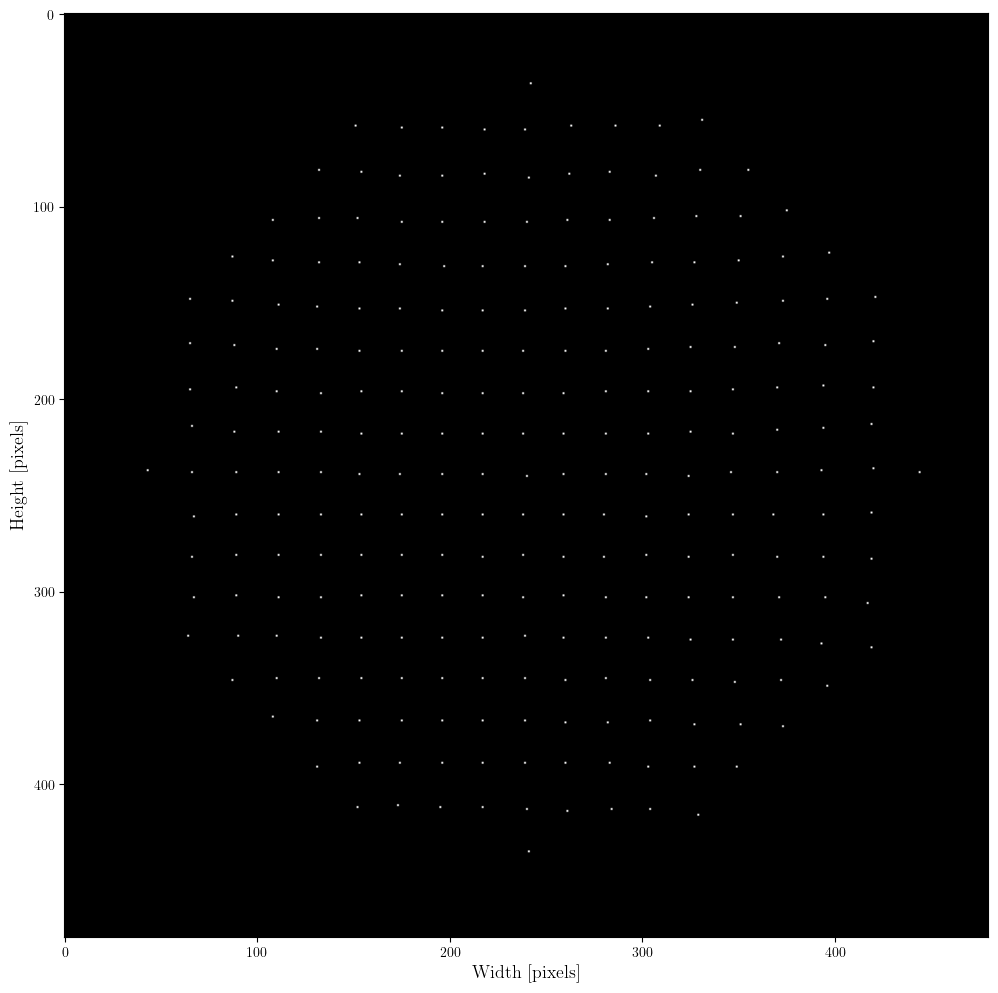

In [22]:
plt.figure(figsize=(12,12))
plt.imshow(matA, cmap="gray")
plt.xlabel('Width [pixels]', size=13)
plt.ylabel('Height [pixels]', size=13)

In [23]:
df["x_d"] = df["x"] * delta
df["y_d"] = df["y"] * delta

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pos     253 non-null    int64  
 1   x       253 non-null    float64
 2   y       253 non-null    float64
 3   x_d     253 non-null    float64
 4   y_d     253 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 10.0 KB


In [25]:
df.head(10)

,pos,x,y,x_d,y_d
0,1,36.707184,242.374093,0.734144,4.847482
1,2,58.035874,151.958697,1.160717,3.039174
2,3,59.342646,175.818680,1.186853,3.516374
3,4,59.661530,196.490943,1.193231,3.929819
4,5,60.381818,218.452964,1.207636,4.369059
5,6,60.156397,239.797748,1.203128,4.795955
6,7,58.667089,263.270133,1.173342,5.265403
7,8,58.110722,286.398557,1.162214,5.727971
8,9,58.793473,309.486118,1.175869,6.189722
9,10,55.316792,331.458573,1.106336,6.629171


In [26]:
mat_R_X = np.zeros((19,19))

In [27]:
mat_R_X[9][0] = df["x_d"][0]

mat_R_X[5][1] = df["x_d"][1]
mat_R_X[6][1] = df["x_d"][2]
mat_R_X[7][1] = df["x_d"][3]
mat_R_X[8][1] = df["x_d"][4]
mat_R_X[9][1] = df["x_d"][5]
mat_R_X[10][1] = df["x_d"][6]
mat_R_X[11][1] = df["x_d"][7]
mat_R_X[12][1] = df["x_d"][8]
mat_R_X[13][1] = df["x_d"][9]

mat_R_X[4][2] = df["x_d"][10]
mat_R_X[5][2] = df["x_d"][11]
mat_R_X[6][2] = df["x_d"][12]
mat_R_X[7][2] = df["x_d"][13]
mat_R_X[8][2] = df["x_d"][14]
mat_R_X[9][2] = df["x_d"][15]
mat_R_X[10][2] = df["x_d"][16]
mat_R_X[11][2] = df["x_d"][17]
mat_R_X[12][2] = df["x_d"][18]
mat_R_X[13][2] = df["x_d"][19]
mat_R_X[14][2] = df["x_d"][20]

mat_R_X[3][3] = df["x_d"][21]
mat_R_X[4][3] = df["x_d"][22]
mat_R_X[5][3] = df["x_d"][23]
mat_R_X[6][3] = df["x_d"][24]
mat_R_X[7][3] = df["x_d"][25]
mat_R_X[8][3] = df["x_d"][26]
mat_R_X[9][3] = df["x_d"][27]
mat_R_X[10][3] = df["x_d"][28]
mat_R_X[11][3] = df["x_d"][29]
mat_R_X[12][3] = df["x_d"][30]
mat_R_X[13][3] = df["x_d"][31]
mat_R_X[14][3] = df["x_d"][32]
mat_R_X[15][3] = df["x_d"][33]

mat_R_X[2][4] = df["x_d"][34]
mat_R_X[3][4] = df["x_d"][35]
mat_R_X[4][4] = df["x_d"][36]
mat_R_X[5][4] = df["x_d"][37]
mat_R_X[6][4] = df["x_d"][38]
mat_R_X[7][4] = df["x_d"][39]
mat_R_X[8][4] = df["x_d"][40]
mat_R_X[9][4] = df["x_d"][41]
mat_R_X[10][4] = df["x_d"][42]
mat_R_X[11][4] = df["x_d"][43]
mat_R_X[12][4] = df["x_d"][44]
mat_R_X[13][4] = df["x_d"][45]
mat_R_X[14][4] = df["x_d"][46]
mat_R_X[15][4] = df["x_d"][47]
mat_R_X[16][4] = df["x_d"][48]

In [28]:
counter = 49
for ii in range(5,14):
    if (ii == 9 ):
        for jj in range(0, 19):
            mat_R_X[jj][ii] = df["x_d"][counter]      
            counter+=1        
    else:
        for jj in range(1,18):
            mat_R_X[jj][ii] = df["x_d"][counter] 
            counter+=1

In [29]:
mat_R_X[2][14] = df["x_d"][204]
mat_R_X[3][14] = df["x_d"][205]
mat_R_X[4][14] = df["x_d"][206]
mat_R_X[5][14] = df["x_d"][207]
mat_R_X[6][14] = df["x_d"][208]
mat_R_X[7][14] = df["x_d"][209]
mat_R_X[8][14] = df["x_d"][210]
mat_R_X[9][14] = df["x_d"][211]
mat_R_X[10][14] = df["x_d"][212]
mat_R_X[11][14] = df["x_d"][213]
mat_R_X[12][14] = df["x_d"][214]
mat_R_X[13][14] = df["x_d"][215]
mat_R_X[14][14] = df["x_d"][216]
mat_R_X[15][14] = df["x_d"][217]
mat_R_X[16][14] = df["x_d"][218]

In [30]:
mat_R_X[3][15] = df["x_d"][219]
mat_R_X[4][15] = df["x_d"][220]
mat_R_X[5][15] = df["x_d"][221]
mat_R_X[6][15] = df["x_d"][222]
mat_R_X[7][15] = df["x_d"][223]
mat_R_X[8][15] = df["x_d"][224]
mat_R_X[9][15] = df["x_d"][225]
mat_R_X[10][15] = df["x_d"][226]
mat_R_X[11][15] = df["x_d"][227]
mat_R_X[12][15] = df["x_d"][228]
mat_R_X[13][15] = df["x_d"][229]
mat_R_X[14][15] = df["x_d"][230]
mat_R_X[15][15] = df["x_d"][231]

In [31]:
mat_R_X[4][16] = df["x_d"][232]
mat_R_X[5][16] = df["x_d"][233]
mat_R_X[6][16] = df["x_d"][234]
mat_R_X[7][16] = df["x_d"][235]
mat_R_X[8][16] = df["x_d"][236]
mat_R_X[9][16] = df["x_d"][237]
mat_R_X[10][16] = df["x_d"][238]
mat_R_X[11][16] = df["x_d"][239]
mat_R_X[12][16] = df["x_d"][240]
mat_R_X[13][16] = df["x_d"][241]
mat_R_X[14][16] = df["x_d"][242]

In [32]:
mat_R_X[5][17] = df["x_d"][243]
mat_R_X[6][17] = df["x_d"][244]
mat_R_X[7][17] = df["x_d"][245]
mat_R_X[8][17] = df["x_d"][246]
mat_R_X[9][17] = df["x_d"][247]
mat_R_X[10][17] = df["x_d"][248]
mat_R_X[11][17] = df["x_d"][249]
mat_R_X[12][17] = df["x_d"][250]
mat_R_X[13][17] = df["x_d"][251]

In [33]:
mat_R_X[9][18] = df["x_d"][252]

Text(0.5, 1.0, 'X positions')

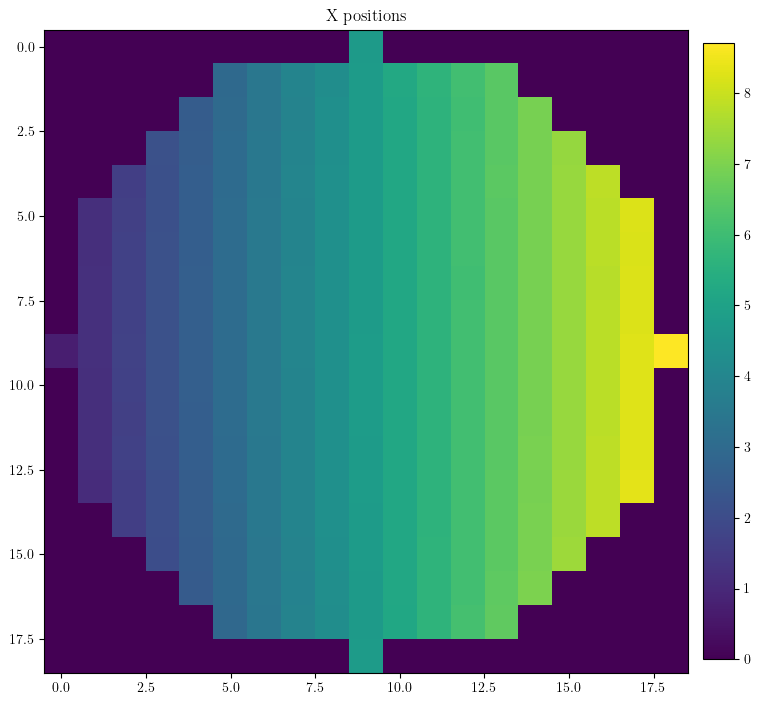

In [34]:
plt.figure(figsize=(10, 10))
im = plt.imshow(mat_R_X) 
cbar = plt.colorbar(im, shrink=0.8, pad=0.02) 
plt.title("X positions")

In [35]:
npmat_R_X = np.array(mat_R_X)

Now, we are going to stablish the Y positions, in order to compute the quantities in which we are interested in.

In [36]:
mat_R_Y = np.zeros((19,19))

In [37]:
mat_R_Y[9][0] = df["y_d"][0]

mat_R_Y[5][1] = df["y_d"][1]
mat_R_Y[6][1] = df["y_d"][2]
mat_R_Y[7][1] = df["y_d"][3]
mat_R_Y[8][1] = df["y_d"][4]
mat_R_Y[9][1] = df["y_d"][5]
mat_R_Y[10][1] = df["y_d"][6]
mat_R_Y[11][1] = df["y_d"][7]
mat_R_Y[12][1] = df["y_d"][8]
mat_R_Y[13][1] = df["y_d"][9]

mat_R_Y[4][2] = df["y_d"][10]
mat_R_Y[5][2] = df["y_d"][11]
mat_R_Y[6][2] = df["y_d"][12]
mat_R_Y[7][2] = df["y_d"][13]
mat_R_Y[8][2] = df["y_d"][14]
mat_R_Y[9][2] = df["y_d"][15]
mat_R_Y[10][2] = df["y_d"][16]
mat_R_Y[11][2] = df["y_d"][17]
mat_R_Y[12][2] = df["y_d"][18]
mat_R_Y[13][2] = df["y_d"][19]
mat_R_Y[14][2] = df["y_d"][20]

mat_R_Y[3][3] = df["y_d"][21]
mat_R_Y[4][3] = df["y_d"][22]
mat_R_Y[5][3] = df["y_d"][23]
mat_R_Y[6][3] = df["y_d"][24]
mat_R_Y[7][3] = df["y_d"][25]
mat_R_Y[8][3] = df["y_d"][26]
mat_R_Y[9][3] = df["y_d"][27]
mat_R_Y[10][3] = df["y_d"][28]
mat_R_Y[11][3] = df["y_d"][29]
mat_R_Y[12][3] = df["y_d"][30]
mat_R_Y[13][3] = df["y_d"][31]
mat_R_Y[14][3] = df["y_d"][32]
mat_R_Y[15][3] = df["y_d"][33]

mat_R_Y[2][4] = df["y_d"][34]
mat_R_Y[3][4] = df["y_d"][35]
mat_R_Y[4][4] = df["y_d"][36]
mat_R_Y[5][4] = df["y_d"][37]
mat_R_Y[6][4] = df["y_d"][38]
mat_R_Y[7][4] = df["y_d"][39]
mat_R_Y[8][4] = df["y_d"][40]
mat_R_Y[9][4] = df["y_d"][41]
mat_R_Y[10][4] = df["y_d"][42]
mat_R_Y[11][4] = df["y_d"][43]
mat_R_Y[12][4] = df["y_d"][44]
mat_R_Y[13][4] = df["y_d"][45]
mat_R_Y[14][4] = df["y_d"][46]
mat_R_Y[15][4] = df["y_d"][47]
mat_R_Y[16][4] = df["y_d"][48]

In [38]:
counter = 49
for ii in range(5,14):
    if (ii == 9 ):
        for jj in range(0, 19):
            mat_R_Y[jj][ii] = df["y_d"][counter]      
            counter+=1        
    else:
        for jj in range(1,18):
            mat_R_Y[jj][ii] = df["y_d"][counter] 
            counter+=1

In [39]:
mat_R_Y[2][14] = df["y_d"][204]
mat_R_Y[3][14] = df["y_d"][205]
mat_R_Y[4][14] = df["y_d"][206]
mat_R_Y[5][14] = df["y_d"][207]
mat_R_Y[6][14] = df["y_d"][208]
mat_R_Y[7][14] = df["y_d"][209]
mat_R_Y[8][14] = df["y_d"][210]
mat_R_Y[9][14] = df["y_d"][211]
mat_R_Y[10][14] = df["y_d"][212]
mat_R_Y[11][14] = df["y_d"][213]
mat_R_Y[12][14] = df["y_d"][214]
mat_R_Y[13][14] = df["y_d"][215]
mat_R_Y[14][14] = df["y_d"][216]
mat_R_Y[15][14] = df["y_d"][217]
mat_R_Y[16][14] = df["y_d"][218]

mat_R_Y[3][15] = df["y_d"][219]
mat_R_Y[4][15] = df["y_d"][220]
mat_R_Y[5][15] = df["y_d"][221]
mat_R_Y[6][15] = df["y_d"][222]
mat_R_Y[7][15] = df["y_d"][223]
mat_R_Y[8][15] = df["y_d"][224]
mat_R_Y[9][15] = df["y_d"][225]
mat_R_Y[10][15] = df["y_d"][226]
mat_R_Y[11][15] = df["y_d"][227]
mat_R_Y[12][15] = df["y_d"][228]
mat_R_Y[13][15] = df["y_d"][229]
mat_R_Y[14][15] = df["y_d"][230]
mat_R_Y[15][15] = df["y_d"][231]

mat_R_Y[4][16] = df["y_d"][232]
mat_R_Y[5][16] = df["y_d"][233]
mat_R_Y[6][16] = df["y_d"][234]
mat_R_Y[7][16] = df["y_d"][235]
mat_R_Y[8][16] = df["y_d"][236]
mat_R_Y[9][16] = df["y_d"][237]
mat_R_Y[10][16] = df["y_d"][238]
mat_R_Y[11][16] = df["y_d"][239]
mat_R_Y[12][16] = df["y_d"][240]
mat_R_Y[13][16] = df["y_d"][241]
mat_R_Y[14][16] = df["y_d"][242]

mat_R_Y[5][17] = df["y_d"][243]
mat_R_Y[6][17] = df["y_d"][244]
mat_R_Y[7][17] = df["y_d"][245]
mat_R_Y[8][17] = df["y_d"][246]
mat_R_Y[9][17] = df["y_d"][247]
mat_R_Y[10][17] = df["y_d"][248]
mat_R_Y[11][17] = df["y_d"][249]
mat_R_Y[12][17] = df["y_d"][250]
mat_R_Y[13][17] = df["y_d"][251]

mat_R_Y[9][18] = df["y_d"][252]

Text(0.5, 1.0, 'Y positions')

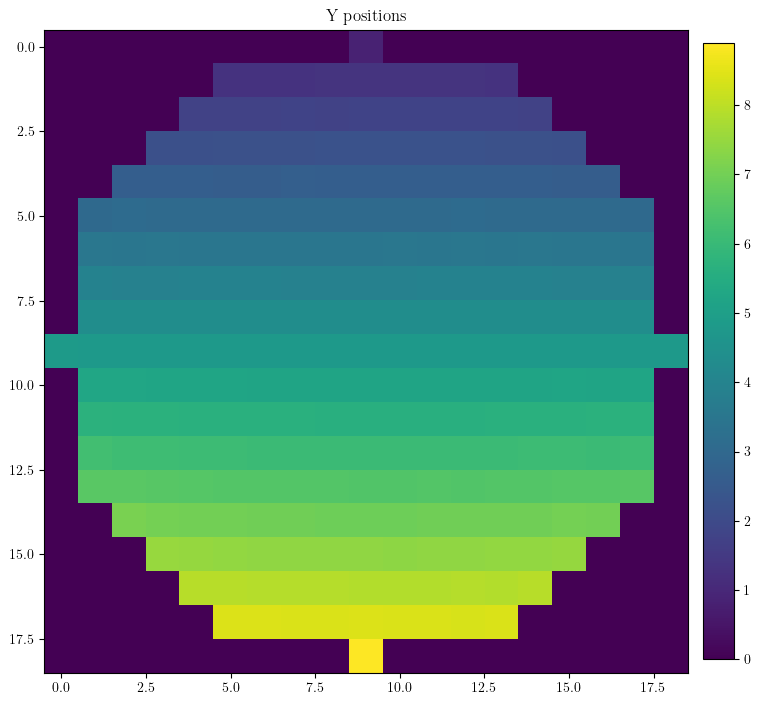

In [40]:
plt.figure(figsize=(10, 10))
im = plt.imshow(mat_R_Y) 
cbar = plt.colorbar(im, shrink=0.8, pad=0.02) 
plt.title("Y positions")

<center> <b>Analysis of the reference image</b> </center>

In [41]:
df_hpref = pd.read_csv('./../data/29-10-reference-centroids-exp.txt', delim_whitespace = True, header=None) #This is with the data coming from the machine learning algorithm
# df_hpref = pd.read_csv('output-that-works.txt', delim_whitespace = True, header=None)

C:\Users\PC\AppData\Local\Temp\ipykernel_1092\4023160462.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_hpref = pd.read_csv('./../data/29-10-reference-centroids-exp.txt', delim_whitespace = True, header=None) #This is with the data coming from the machine learning algorithm


In [42]:
df_hpref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       253 non-null    int64  
 1   1       253 non-null    float64
 2   2       253 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.1 KB


In [43]:
df_hpref.rename(columns={0:'pos', 2:'y', 1:'x'}, inplace=True)

In [44]:
df_hpref.head(3)

,pos,x,y
0,1,67.989136,240.770777
1,2,84.944568,163.289357
2,3,85.299958,183.576651


In [45]:
matA_hpref = np.zeros((480,480))

In [46]:
#This code corresponds to the scale stablished from pixels to distance. It is 0.02mm per pixel
delta = 0.02
X = np.linspace(0, 480*delta + delta, 480)

In [47]:
df_img_ref = np.floor(df_hpref).astype(int)

In [48]:
df_img_ref.head(5)

,pos,x,y
0,1,67,240
1,2,84,163
2,3,85,183
3,4,85,201
4,5,85,220


In [49]:
N = df_hpref.shape[0] #Number of centroids in the pattern

counter = 0 #Just to verify
for ii in range(0,N):
    matA_hpref[df_img_ref["y"][ii]][df_img_ref["x"][ii]] = 1
    counter += 1
counter 

253

Text(0, 0.5, 'Height [pixels]')

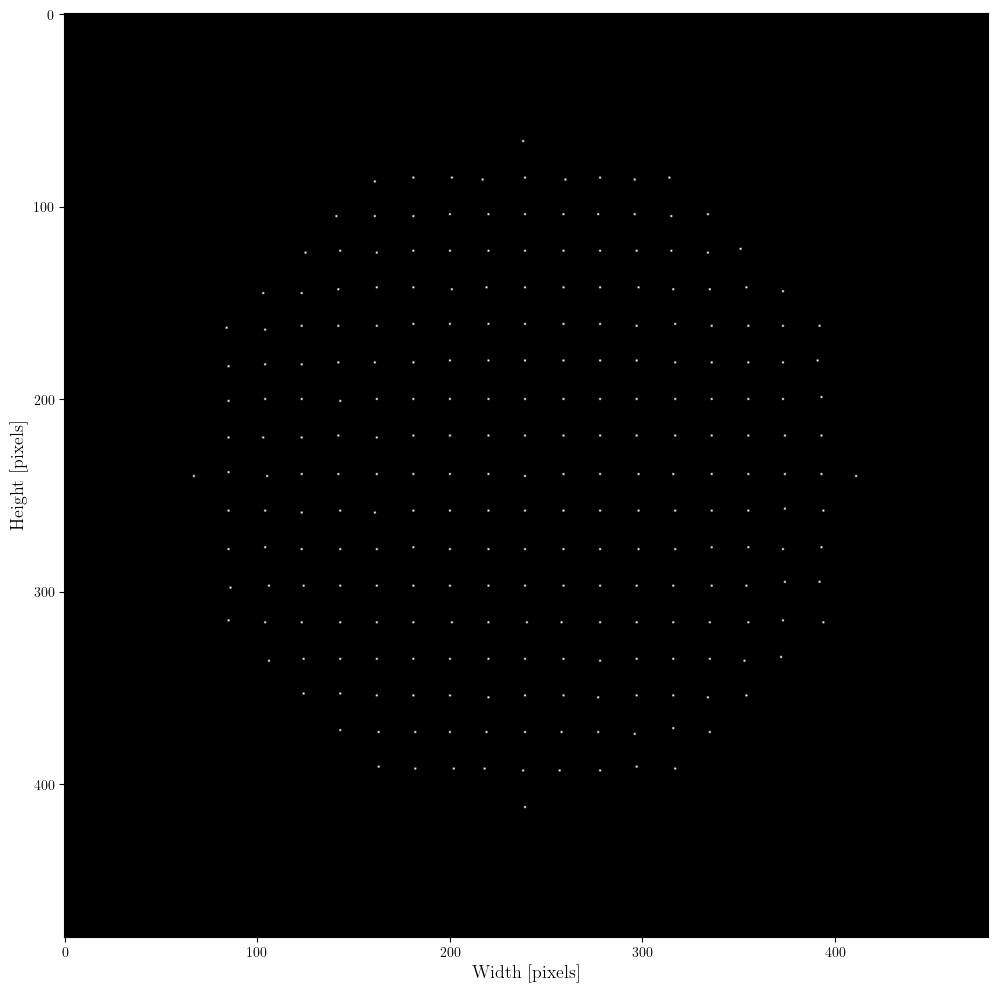

In [50]:
plt.figure(figsize=(12,12))
plt.imshow(matA_hpref, cmap="grey")
plt.xlabel('Width [pixels]', size=13)
plt.ylabel('Height [pixels]', size=13)

<center><b> Comparison between the pattern of points generated by reference surface and right eye <center><b>

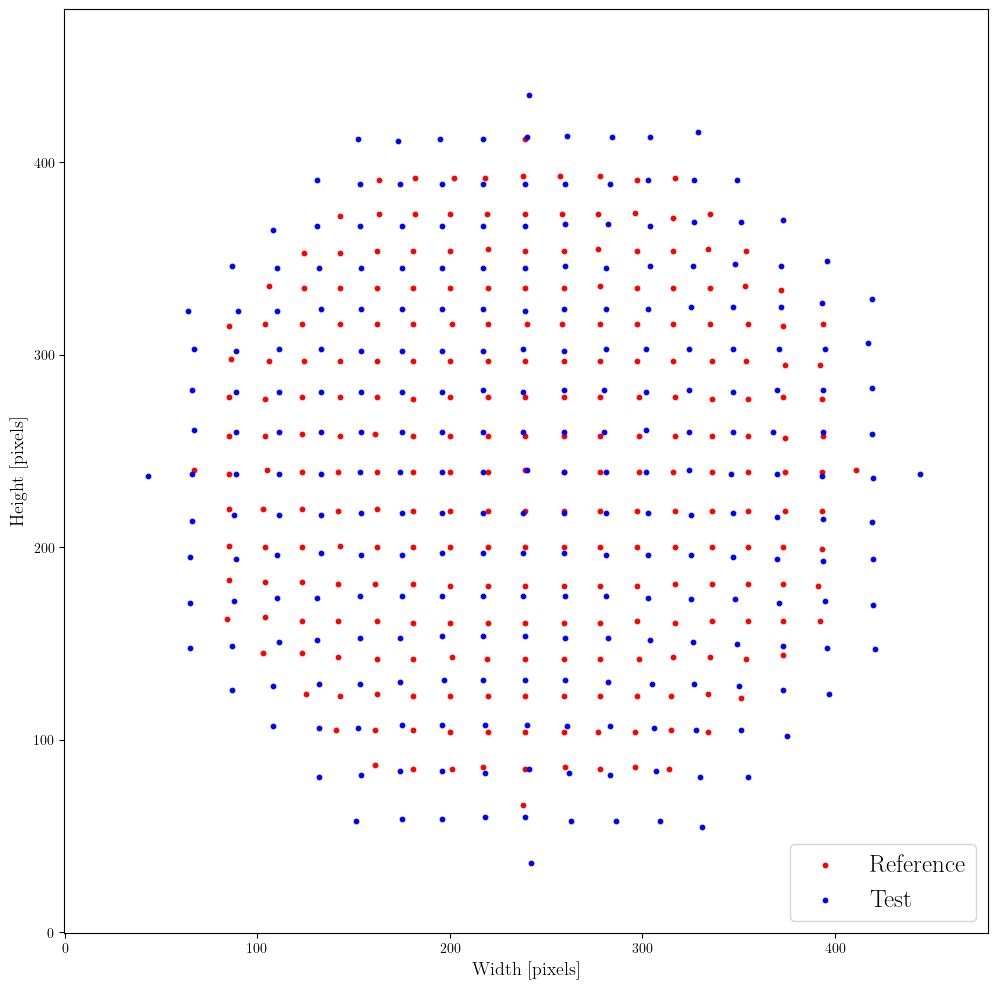

In [51]:
plt.figure(figsize=(12,12))

x1, y1 = np.nonzero(matA_hpref)  # rows, cols
y2, x2 = np.nonzero(matA)

plt.imshow(np.ones_like(matA), cmap="gray", vmin=0, vmax=1)

# Plot nonzero points as scatter
plt.scatter(y1, x1, c="red", s=10, label="Reference")   # s = markersize
plt.scatter(x2, y2, c="blue", s=10, label="Test")

plt.xlabel('Width [pixels]', size=13)
plt.ylabel('Height [pixels]', size=13)
plt.legend(fontsize=18, loc="lower right")
plt.gca().invert_yaxis()  # optional, to match image coordinates
plt.show()


In [52]:
df_hpref["x_d"] = df_hpref["x"] * delta
df_hpref["y_d"] = df_hpref["y"] * delta

In [53]:
df_hpref.head(10)

,pos,x,y,x_d,y_d
0,1,67.989136,240.770777,1.359783,4.815416
1,2,84.944568,163.289357,1.698891,3.265787
2,3,85.299958,183.576651,1.705999,3.671533
3,4,85.169598,201.381910,1.703392,4.027638
4,5,85.556866,220.377422,1.711137,4.407548
5,6,85.649359,238.858583,1.712987,4.777172
6,7,85.158684,258.981101,1.703174,5.179622
7,8,85.360393,278.672753,1.707208,5.573455
8,9,86.888889,298.017802,1.737778,5.960356
9,10,85.134177,315.946203,1.702684,6.318924


In [54]:
mat_R_X_hpref = np.zeros((19,19))

In [55]:
dasd = df_hpref[df_hpref["pos"]==1]["x_d"].values[0]
dasd

1.3597827268

In [56]:
mat_R_X_hpref[9][0] = df_hpref[df_hpref["pos"]==1]["x_d"].values[0]

mat_R_X_hpref[5][1] = df_hpref[df_hpref["pos"]==2]["x_d"].values[0]
mat_R_X_hpref[6][1] = df_hpref[df_hpref["pos"]==3]["x_d"].values[0]
mat_R_X_hpref[7][1] = df_hpref[df_hpref["pos"]==4]["x_d"].values[0]
mat_R_X_hpref[8][1] = df_hpref[df_hpref["pos"]==5]["x_d"].values[0]
mat_R_X_hpref[9][1] = df_hpref[df_hpref["pos"]==6]["x_d"].values[0]
mat_R_X_hpref[10][1] = df_hpref[df_hpref["pos"]==7]["x_d"].values[0]
mat_R_X_hpref[11][1] = df_hpref[df_hpref["pos"]==8]["x_d"].values[0]
mat_R_X_hpref[12][1] = df_hpref[df_hpref["pos"]==9]["x_d"].values[0]
mat_R_X_hpref[13][1] = df_hpref[df_hpref["pos"]==10]["x_d"].values[0]

mat_R_X_hpref[4][2] = df_hpref[df_hpref["pos"]==11]["x_d"].values[0]
mat_R_X_hpref[5][2] = df_hpref[df_hpref["pos"]==12]["x_d"].values[0]
mat_R_X_hpref[6][2] = df_hpref[df_hpref["pos"]==13]["x_d"].values[0]
mat_R_X_hpref[7][2] = df_hpref[df_hpref["pos"]==14]["x_d"].values[0]
mat_R_X_hpref[8][2] = df_hpref[df_hpref["pos"]==15]["x_d"].values[0]
mat_R_X_hpref[9][2] = df_hpref[df_hpref["pos"]==16]["x_d"].values[0]
mat_R_X_hpref[10][2] = df_hpref[df_hpref["pos"]==17]["x_d"].values[0]
mat_R_X_hpref[11][2] = df_hpref[df_hpref["pos"]==18]["x_d"].values[0]
mat_R_X_hpref[12][2] = df_hpref[df_hpref["pos"]==19]["x_d"].values[0]
mat_R_X_hpref[13][2] = df_hpref[df_hpref["pos"]==20]["x_d"].values[0]
mat_R_X_hpref[14][2] = df_hpref[df_hpref["pos"]==21]["x_d"].values[0]

mat_R_X_hpref[3][3] = df_hpref[df_hpref["pos"]==22]["x_d"].values[0]
mat_R_X_hpref[4][3] = df_hpref[df_hpref["pos"]==23]["x_d"].values[0]
mat_R_X_hpref[5][3] = df_hpref[df_hpref["pos"]==24]["x_d"].values[0]
mat_R_X_hpref[6][3] = df_hpref[df_hpref["pos"]==25]["x_d"].values[0]
mat_R_X_hpref[7][3] = df_hpref[df_hpref["pos"]==26]["x_d"].values[0]
mat_R_X_hpref[8][3] = df_hpref[df_hpref["pos"]==27]["x_d"].values[0]
mat_R_X_hpref[9][3] = df_hpref[df_hpref["pos"]==28]["x_d"].values[0]
mat_R_X_hpref[10][3] = df_hpref[df_hpref["pos"]==29]["x_d"].values[0]
mat_R_X_hpref[11][3] = df_hpref[df_hpref["pos"]==30]["x_d"].values[0]
mat_R_X_hpref[12][3] = df_hpref[df_hpref["pos"]==31]["x_d"].values[0]
mat_R_X_hpref[13][3] = df_hpref[df_hpref["pos"]==32]["x_d"].values[0]
mat_R_X_hpref[14][3] = df_hpref[df_hpref["pos"]==33]["x_d"].values[0]
mat_R_X_hpref[15][3] = df_hpref[df_hpref["pos"]==34]["x_d"].values[0]

mat_R_X_hpref[2][4] = df_hpref[df_hpref["pos"]==35]["x_d"].values[0]
mat_R_X_hpref[3][4] = df_hpref[df_hpref["pos"]==36]["x_d"].values[0]
mat_R_X_hpref[4][4] = df_hpref[df_hpref["pos"]==37]["x_d"].values[0]
mat_R_X_hpref[5][4] = df_hpref[df_hpref["pos"]==38]["x_d"].values[0]
mat_R_X_hpref[6][4] = df_hpref[df_hpref["pos"]==39]["x_d"].values[0]
mat_R_X_hpref[7][4] = df_hpref[df_hpref["pos"]==40]["x_d"].values[0]
mat_R_X_hpref[8][4] = df_hpref[df_hpref["pos"]==41]["x_d"].values[0]
mat_R_X_hpref[9][4] = df_hpref[df_hpref["pos"]==42]["x_d"].values[0]
mat_R_X_hpref[10][4] = df_hpref[df_hpref["pos"]==43]["x_d"].values[0]
mat_R_X_hpref[11][4] = df_hpref[df_hpref["pos"]==44]["x_d"].values[0]
mat_R_X_hpref[12][4] = df_hpref[df_hpref["pos"]==45]["x_d"].values[0]
mat_R_X_hpref[13][4] = df_hpref[df_hpref["pos"]==46]["x_d"].values[0]
mat_R_X_hpref[14][4] = df_hpref[df_hpref["pos"]==47]["x_d"].values[0]
mat_R_X_hpref[15][4] = df_hpref[df_hpref["pos"]==48]["x_d"].values[0]
mat_R_X_hpref[16][4] = df_hpref[df_hpref["pos"]==49]["x_d"].values[0]

In [57]:
counter = 50  # Starting from position 50 (since we ended at 49 previously)

for ii in range(5,14):
    if (ii == 9 ):
        for jj in range(0, 19):
            mat_R_X_hpref[jj][ii] = df_hpref[df_hpref["pos"]==counter]["x_d"].values[0]
            counter += 1        
    else:
        for jj in range(1,18):
            mat_R_X_hpref[jj][ii] = df_hpref[df_hpref["pos"]==counter]["x_d"].values[0]
            counter += 1

In [58]:
mat_R_X_hpref[2][14] = df_hpref[df_hpref["pos"]==205]["x_d"].values[0]
mat_R_X_hpref[3][14] = df_hpref[df_hpref["pos"]==206]["x_d"].values[0]
mat_R_X_hpref[4][14] = df_hpref[df_hpref["pos"]==207]["x_d"].values[0]
mat_R_X_hpref[5][14] = df_hpref[df_hpref["pos"]==208]["x_d"].values[0]
mat_R_X_hpref[6][14] = df_hpref[df_hpref["pos"]==209]["x_d"].values[0]
mat_R_X_hpref[7][14] = df_hpref[df_hpref["pos"]==210]["x_d"].values[0]
mat_R_X_hpref[8][14] = df_hpref[df_hpref["pos"]==211]["x_d"].values[0]
mat_R_X_hpref[9][14] = df_hpref[df_hpref["pos"]==212]["x_d"].values[0]
mat_R_X_hpref[10][14] = df_hpref[df_hpref["pos"]==213]["x_d"].values[0]
mat_R_X_hpref[11][14] = df_hpref[df_hpref["pos"]==214]["x_d"].values[0]
mat_R_X_hpref[12][14] = df_hpref[df_hpref["pos"]==215]["x_d"].values[0]
mat_R_X_hpref[13][14] = df_hpref[df_hpref["pos"]==216]["x_d"].values[0]
mat_R_X_hpref[14][14] = df_hpref[df_hpref["pos"]==217]["x_d"].values[0]
mat_R_X_hpref[15][14] = df_hpref[df_hpref["pos"]==218]["x_d"].values[0]
mat_R_X_hpref[16][14] = df_hpref[df_hpref["pos"]==219]["x_d"].values[0]

mat_R_X_hpref[3][15] = df_hpref[df_hpref["pos"]==220]["x_d"].values[0]
mat_R_X_hpref[4][15] = df_hpref[df_hpref["pos"]==221]["x_d"].values[0]
mat_R_X_hpref[5][15] = df_hpref[df_hpref["pos"]==222]["x_d"].values[0]
mat_R_X_hpref[6][15] = df_hpref[df_hpref["pos"]==223]["x_d"].values[0]
mat_R_X_hpref[7][15] = df_hpref[df_hpref["pos"]==224]["x_d"].values[0]
mat_R_X_hpref[8][15] = df_hpref[df_hpref["pos"]==225]["x_d"].values[0]
mat_R_X_hpref[9][15] = df_hpref[df_hpref["pos"]==226]["x_d"].values[0]
mat_R_X_hpref[10][15] = df_hpref[df_hpref["pos"]==227]["x_d"].values[0]
mat_R_X_hpref[11][15] = df_hpref[df_hpref["pos"]==228]["x_d"].values[0]
mat_R_X_hpref[12][15] = df_hpref[df_hpref["pos"]==229]["x_d"].values[0]
mat_R_X_hpref[13][15] = df_hpref[df_hpref["pos"]==230]["x_d"].values[0]
mat_R_X_hpref[14][15] = df_hpref[df_hpref["pos"]==231]["x_d"].values[0]
mat_R_X_hpref[15][15] = df_hpref[df_hpref["pos"]==232]["x_d"].values[0]

mat_R_X_hpref[4][16] = df_hpref[df_hpref["pos"]==233]["x_d"].values[0]
mat_R_X_hpref[5][16] = df_hpref[df_hpref["pos"]==234]["x_d"].values[0]
mat_R_X_hpref[6][16] = df_hpref[df_hpref["pos"]==235]["x_d"].values[0]
mat_R_X_hpref[7][16] = df_hpref[df_hpref["pos"]==236]["x_d"].values[0]
mat_R_X_hpref[8][16] = df_hpref[df_hpref["pos"]==237]["x_d"].values[0]
mat_R_X_hpref[9][16] = df_hpref[df_hpref["pos"]==238]["x_d"].values[0]
mat_R_X_hpref[10][16] = df_hpref[df_hpref["pos"]==239]["x_d"].values[0]
mat_R_X_hpref[11][16] = df_hpref[df_hpref["pos"]==240]["x_d"].values[0]
mat_R_X_hpref[12][16] = df_hpref[df_hpref["pos"]==241]["x_d"].values[0]
mat_R_X_hpref[13][16] = df_hpref[df_hpref["pos"]==242]["x_d"].values[0]
mat_R_X_hpref[14][16] = df_hpref[df_hpref["pos"]==243]["x_d"].values[0]

mat_R_X_hpref[5][17] = df_hpref[df_hpref["pos"]==244]["x_d"].values[0]
mat_R_X_hpref[6][17] = df_hpref[df_hpref["pos"]==245]["x_d"].values[0]
mat_R_X_hpref[7][17] = df_hpref[df_hpref["pos"]==246]["x_d"].values[0]
mat_R_X_hpref[8][17] = df_hpref[df_hpref["pos"]==247]["x_d"].values[0]
mat_R_X_hpref[9][17] = df_hpref[df_hpref["pos"]==248]["x_d"].values[0]
mat_R_X_hpref[10][17] = df_hpref[df_hpref["pos"]==249]["x_d"].values[0]
mat_R_X_hpref[11][17] = df_hpref[df_hpref["pos"]==250]["x_d"].values[0]
mat_R_X_hpref[12][17] = df_hpref[df_hpref["pos"]==251]["x_d"].values[0]
mat_R_X_hpref[13][17] = df_hpref[df_hpref["pos"]==252]["x_d"].values[0]

mat_R_X_hpref[9][18] = df_hpref[df_hpref["pos"]==253]["x_d"].values[0]

Text(0.5, 1.0, 'Y positions')

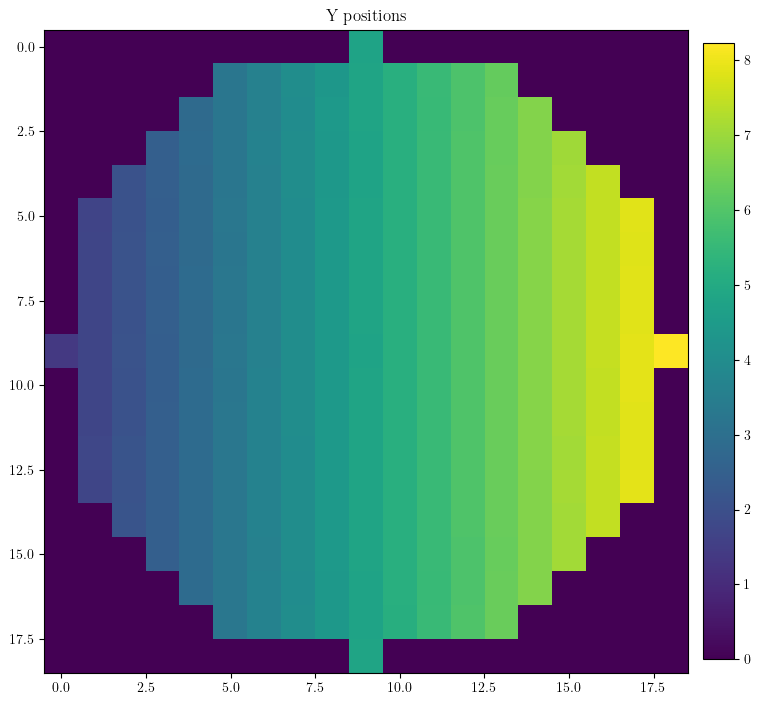

In [59]:
plt.figure(figsize=(10, 10))
im = plt.imshow(mat_R_X_hpref)
cbar = plt.colorbar(im, shrink=0.8, pad=0.02)
plt.title("Y positions")

In [60]:
mat_R_Y_hpref = np.zeros((19,19))

In [61]:
mat_R_Y_hpref[9][0] = df_hpref[df_hpref["pos"]==1]["y_d"].values[0]

mat_R_Y_hpref[5][1] = df_hpref[df_hpref["pos"]==2]["y_d"].values[0]
mat_R_Y_hpref[6][1] = df_hpref[df_hpref["pos"]==3]["y_d"].values[0]
mat_R_Y_hpref[7][1] = df_hpref[df_hpref["pos"]==4]["y_d"].values[0]
mat_R_Y_hpref[8][1] = df_hpref[df_hpref["pos"]==5]["y_d"].values[0]
mat_R_Y_hpref[9][1] = df_hpref[df_hpref["pos"]==6]["y_d"].values[0]
mat_R_Y_hpref[10][1] = df_hpref[df_hpref["pos"]==7]["y_d"].values[0]
mat_R_Y_hpref[11][1] = df_hpref[df_hpref["pos"]==8]["y_d"].values[0]
mat_R_Y_hpref[12][1] = df_hpref[df_hpref["pos"]==9]["y_d"].values[0]
mat_R_Y_hpref[13][1] = df_hpref[df_hpref["pos"]==10]["y_d"].values[0]

mat_R_Y_hpref[4][2] = df_hpref[df_hpref["pos"]==11]["y_d"].values[0]
mat_R_Y_hpref[5][2] = df_hpref[df_hpref["pos"]==12]["y_d"].values[0]
mat_R_Y_hpref[6][2] = df_hpref[df_hpref["pos"]==13]["y_d"].values[0]
mat_R_Y_hpref[7][2] = df_hpref[df_hpref["pos"]==14]["y_d"].values[0]
mat_R_Y_hpref[8][2] = df_hpref[df_hpref["pos"]==15]["y_d"].values[0]
mat_R_Y_hpref[9][2] = df_hpref[df_hpref["pos"]==16]["y_d"].values[0]
mat_R_Y_hpref[10][2] = df_hpref[df_hpref["pos"]==17]["y_d"].values[0]
mat_R_Y_hpref[11][2] = df_hpref[df_hpref["pos"]==18]["y_d"].values[0]
mat_R_Y_hpref[12][2] = df_hpref[df_hpref["pos"]==19]["y_d"].values[0]
mat_R_Y_hpref[13][2] = df_hpref[df_hpref["pos"]==20]["y_d"].values[0]
mat_R_Y_hpref[14][2] = df_hpref[df_hpref["pos"]==21]["y_d"].values[0]

mat_R_Y_hpref[3][3] = df_hpref[df_hpref["pos"]==22]["y_d"].values[0]
mat_R_Y_hpref[4][3] = df_hpref[df_hpref["pos"]==23]["y_d"].values[0]
mat_R_Y_hpref[5][3] = df_hpref[df_hpref["pos"]==24]["y_d"].values[0]
mat_R_Y_hpref[6][3] = df_hpref[df_hpref["pos"]==25]["y_d"].values[0]
mat_R_Y_hpref[7][3] = df_hpref[df_hpref["pos"]==26]["y_d"].values[0]
mat_R_Y_hpref[8][3] = df_hpref[df_hpref["pos"]==27]["y_d"].values[0]
mat_R_Y_hpref[9][3] = df_hpref[df_hpref["pos"]==28]["y_d"].values[0]
mat_R_Y_hpref[10][3] = df_hpref[df_hpref["pos"]==29]["y_d"].values[0]
mat_R_Y_hpref[11][3] = df_hpref[df_hpref["pos"]==30]["y_d"].values[0]
mat_R_Y_hpref[12][3] = df_hpref[df_hpref["pos"]==31]["y_d"].values[0]
mat_R_Y_hpref[13][3] = df_hpref[df_hpref["pos"]==32]["y_d"].values[0]
mat_R_Y_hpref[14][3] = df_hpref[df_hpref["pos"]==33]["y_d"].values[0]
mat_R_Y_hpref[15][3] = df_hpref[df_hpref["pos"]==34]["y_d"].values[0]

mat_R_Y_hpref[2][4] = df_hpref[df_hpref["pos"]==35]["y_d"].values[0]
mat_R_Y_hpref[3][4] = df_hpref[df_hpref["pos"]==36]["y_d"].values[0]
mat_R_Y_hpref[4][4] = df_hpref[df_hpref["pos"]==37]["y_d"].values[0]
mat_R_Y_hpref[5][4] = df_hpref[df_hpref["pos"]==38]["y_d"].values[0]
mat_R_Y_hpref[6][4] = df_hpref[df_hpref["pos"]==39]["y_d"].values[0]
mat_R_Y_hpref[7][4] = df_hpref[df_hpref["pos"]==40]["y_d"].values[0]
mat_R_Y_hpref[8][4] = df_hpref[df_hpref["pos"]==41]["y_d"].values[0]
mat_R_Y_hpref[9][4] = df_hpref[df_hpref["pos"]==42]["y_d"].values[0]
mat_R_Y_hpref[10][4] = df_hpref[df_hpref["pos"]==43]["y_d"].values[0]
mat_R_Y_hpref[11][4] = df_hpref[df_hpref["pos"]==44]["y_d"].values[0]
mat_R_Y_hpref[12][4] = df_hpref[df_hpref["pos"]==45]["y_d"].values[0]
mat_R_Y_hpref[13][4] = df_hpref[df_hpref["pos"]==46]["y_d"].values[0]
mat_R_Y_hpref[14][4] = df_hpref[df_hpref["pos"]==47]["y_d"].values[0]
mat_R_Y_hpref[15][4] = df_hpref[df_hpref["pos"]==48]["y_d"].values[0]
mat_R_Y_hpref[16][4] = df_hpref[df_hpref["pos"]==49]["y_d"].values[0]

In [62]:
counter = 50  # Starting from position 50 (since we ended at 49 previously)

for ii in range(5,14):
    if (ii == 9 ):
        for jj in range(0, 19):
            mat_R_Y_hpref[jj][ii] = df_hpref[df_hpref["pos"]==counter]["y_d"].values[0]
            counter += 1        
    else:
        for jj in range(1,18):
            mat_R_Y_hpref[jj][ii] = df_hpref[df_hpref["pos"]==counter]["y_d"].values[0]
            counter += 1

In [63]:
mat_R_Y_hpref[2][14] = df_hpref[df_hpref["pos"]==205]["y_d"].values[0]
mat_R_Y_hpref[3][14] = df_hpref[df_hpref["pos"]==206]["y_d"].values[0]
mat_R_Y_hpref[4][14] = df_hpref[df_hpref["pos"]==207]["y_d"].values[0]
mat_R_Y_hpref[5][14] = df_hpref[df_hpref["pos"]==208]["y_d"].values[0]
mat_R_Y_hpref[6][14] = df_hpref[df_hpref["pos"]==209]["y_d"].values[0]
mat_R_Y_hpref[7][14] = df_hpref[df_hpref["pos"]==210]["y_d"].values[0]
mat_R_Y_hpref[8][14] = df_hpref[df_hpref["pos"]==211]["y_d"].values[0]
mat_R_Y_hpref[9][14] = df_hpref[df_hpref["pos"]==212]["y_d"].values[0]
mat_R_Y_hpref[10][14] = df_hpref[df_hpref["pos"]==213]["y_d"].values[0]
mat_R_Y_hpref[11][14] = df_hpref[df_hpref["pos"]==214]["y_d"].values[0]
mat_R_Y_hpref[12][14] = df_hpref[df_hpref["pos"]==215]["y_d"].values[0]
mat_R_Y_hpref[13][14] = df_hpref[df_hpref["pos"]==216]["y_d"].values[0]
mat_R_Y_hpref[14][14] = df_hpref[df_hpref["pos"]==217]["y_d"].values[0]
mat_R_Y_hpref[15][14] = df_hpref[df_hpref["pos"]==218]["y_d"].values[0]
mat_R_Y_hpref[16][14] = df_hpref[df_hpref["pos"]==219]["y_d"].values[0]

mat_R_Y_hpref[3][15] = df_hpref[df_hpref["pos"]==220]["y_d"].values[0]
mat_R_Y_hpref[4][15] = df_hpref[df_hpref["pos"]==221]["y_d"].values[0]
mat_R_Y_hpref[5][15] = df_hpref[df_hpref["pos"]==222]["y_d"].values[0]
mat_R_Y_hpref[6][15] = df_hpref[df_hpref["pos"]==223]["y_d"].values[0]
mat_R_Y_hpref[7][15] = df_hpref[df_hpref["pos"]==224]["y_d"].values[0]
mat_R_Y_hpref[8][15] = df_hpref[df_hpref["pos"]==225]["y_d"].values[0]
mat_R_Y_hpref[9][15] = df_hpref[df_hpref["pos"]==226]["y_d"].values[0]
mat_R_Y_hpref[10][15] = df_hpref[df_hpref["pos"]==227]["y_d"].values[0]
mat_R_Y_hpref[11][15] = df_hpref[df_hpref["pos"]==228]["y_d"].values[0]
mat_R_Y_hpref[12][15] = df_hpref[df_hpref["pos"]==229]["y_d"].values[0]
mat_R_Y_hpref[13][15] = df_hpref[df_hpref["pos"]==230]["y_d"].values[0]
mat_R_Y_hpref[14][15] = df_hpref[df_hpref["pos"]==231]["y_d"].values[0]
mat_R_Y_hpref[15][15] = df_hpref[df_hpref["pos"]==232]["y_d"].values[0]

mat_R_Y_hpref[4][16] = df_hpref[df_hpref["pos"]==233]["y_d"].values[0]
mat_R_Y_hpref[5][16] = df_hpref[df_hpref["pos"]==234]["y_d"].values[0]
mat_R_Y_hpref[6][16] = df_hpref[df_hpref["pos"]==235]["y_d"].values[0]
mat_R_Y_hpref[7][16] = df_hpref[df_hpref["pos"]==236]["y_d"].values[0]
mat_R_Y_hpref[8][16] = df_hpref[df_hpref["pos"]==237]["y_d"].values[0]
mat_R_Y_hpref[9][16] = df_hpref[df_hpref["pos"]==238]["y_d"].values[0]
mat_R_Y_hpref[10][16] = df_hpref[df_hpref["pos"]==239]["y_d"].values[0]
mat_R_Y_hpref[11][16] = df_hpref[df_hpref["pos"]==240]["y_d"].values[0]
mat_R_Y_hpref[12][16] = df_hpref[df_hpref["pos"]==241]["y_d"].values[0]
mat_R_Y_hpref[13][16] = df_hpref[df_hpref["pos"]==242]["y_d"].values[0]
mat_R_Y_hpref[14][16] = df_hpref[df_hpref["pos"]==243]["y_d"].values[0]

mat_R_Y_hpref[5][17] = df_hpref[df_hpref["pos"]==244]["y_d"].values[0]
mat_R_Y_hpref[6][17] = df_hpref[df_hpref["pos"]==245]["y_d"].values[0]
mat_R_Y_hpref[7][17] = df_hpref[df_hpref["pos"]==246]["y_d"].values[0]
mat_R_Y_hpref[8][17] = df_hpref[df_hpref["pos"]==247]["y_d"].values[0]
mat_R_Y_hpref[9][17] = df_hpref[df_hpref["pos"]==248]["y_d"].values[0]
mat_R_Y_hpref[10][17] = df_hpref[df_hpref["pos"]==249]["y_d"].values[0]
mat_R_Y_hpref[11][17] = df_hpref[df_hpref["pos"]==250]["y_d"].values[0]
mat_R_Y_hpref[12][17] = df_hpref[df_hpref["pos"]==251]["y_d"].values[0]
mat_R_Y_hpref[13][17] = df_hpref[df_hpref["pos"]==252]["y_d"].values[0]

mat_R_Y_hpref[9][18] = df_hpref[df_hpref["pos"]==253]["y_d"].values[0]

Text(0.5, 1.0, 'Y positions')

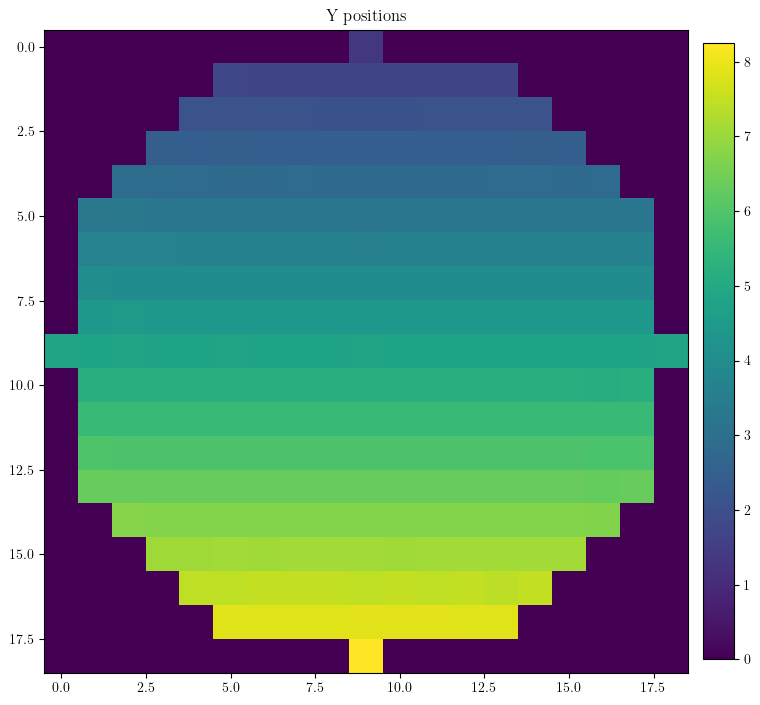

In [64]:
plt.figure(figsize=(10, 10))
im = plt.imshow(mat_R_Y_hpref)
cbar = plt.colorbar(im, shrink=0.8, pad=0.02)
plt.title("Y positions")

<b>                 ---------------------------------------------------------------------------------------------------------------- </b>

<h1><center> <b> Astigmatism </b></center><h1>

Now, we are going to iterate across the whole matrix and implement the algorithm to find the **astigmatism** in each point (those one that are meaningfull for us and the algorithm works)

In [65]:
mat_C = np.zeros((19,19))

In [66]:
ro = 0.4 #We passed from milimeters to meters
R = 7.78 #We passed from milimeters to meters
for ii in range(1,18): #This limits were stablished in order to avoid violating the range in which the matrix is defined
    for jj in range(1,18):
        x_looking = mat_R_X[ii-1][jj] != 0 and mat_R_X[ii+1][jj]!=0 and mat_R_X[ii][jj+1]!=0 and mat_R_X[ii][jj-1]!=0
        y_looking = mat_R_Y[ii-1][jj] != 0 and mat_R_Y[ii+1][jj]!=0 and mat_R_Y[ii][jj+1]!=0 and mat_R_Y[ii][jj-1]!=0
        if ((mat_R_X[ii][jj]!=0 and mat_R_Y[ii][jj]!= 0) and x_looking and y_looking):
            center_x_coord = mat_R_X_hpref[ii][jj]
            delta_x_a = mat_R_X[ii+1][jj] - mat_R_X_hpref[ii+1][jj]
            delta_x_b = mat_R_X[ii][jj+1] - mat_R_X_hpref[ii][jj+1]
            delta_x_c = mat_R_X[ii-1][jj] - mat_R_X_hpref[ii-1][jj]
            delta_x_d = mat_R_X[ii][jj-1] - mat_R_X_hpref[ii][jj-1]

            center_y_coord = mat_R_Y[ii][jj]
            delta_y_a = mat_R_Y[ii+1][jj] - mat_R_Y_hpref[ii+1][jj]
            delta_y_b = mat_R_Y[ii][jj+1] - mat_R_Y_hpref[ii][jj+1]
            delta_y_d = mat_R_Y[ii][jj-1] - mat_R_Y_hpref[ii][jj-1]

            first_factor = ((delta_x_a-delta_x_c) -(delta_y_b - delta_y_d))/(2*ro*R)
            second_factor = ((delta_x_b-delta_x_d)-(delta_y_a - delta_y_b))/(2*ro*R)

            C = (first_factor**2 + second_factor**2)**(1/2)

            mat_C[ii][jj] = C

(-0.5, 18.5, 18.5, -0.5)

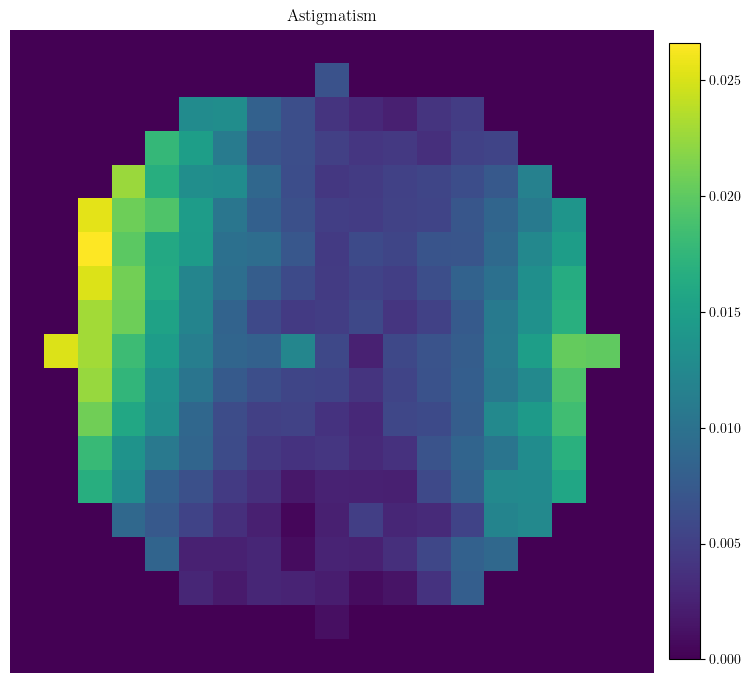

In [67]:
plt.figure(figsize=(10, 10))
im = plt.imshow(mat_C, cmap="viridis") 
cbar = plt.colorbar(im, shrink=0.8, pad=0.02) 
plt.title("Astigmatism")
plt.axis('off')

<h1><center><b>Minimum Curvature Lines</b><center></h1>

In [68]:
mat_Angles = np.zeros((19, 19))

In [69]:
ro = 0.4 #We passed from milimeters to meters
R = 7.78 #We passed from milimeters to meters
for ii in range(1,18): #This limits were stablished in order to avoid violating the range in which the matrix is defined
    for jj in range(1,18):
        x_looking = mat_R_X[ii-1][jj] != 0 and mat_R_X[ii+1][jj]!=0 and mat_R_X[ii][jj+1]!=0 and mat_R_X[ii][jj-1]!=0
        y_looking = mat_R_Y[ii-1][jj] != 0 and mat_R_Y[ii+1][jj]!=0 and mat_R_Y[ii][jj+1]!=0 and mat_R_Y[ii][jj-1]!=0
        if ((mat_R_X[ii][jj]!=0 and mat_R_Y[ii][jj]!= 0) and x_looking and y_looking):
            center_x_coord = mat_R_X_hpref[ii][jj]
            delta_x_a = mat_R_X[ii+1][jj] - mat_R_X_hpref[ii+1][jj]
            delta_x_b = mat_R_X[ii][jj+1] - mat_R_X_hpref[ii][jj+1]
            delta_x_c = mat_R_X[ii-1][jj] - mat_R_X_hpref[ii-1][jj]
            delta_x_d = mat_R_X[ii][jj-1] - mat_R_X_hpref[ii][jj-1]

            center_y_coord = mat_R_Y[ii][jj]
            delta_y_a = mat_R_Y[ii+1][jj] - mat_R_Y_hpref[ii+1][jj]
            delta_y_b = mat_R_Y[ii][jj+1] - mat_R_Y_hpref[ii][jj+1]
            delta_y_d = mat_R_Y[ii][jj-1] - mat_R_Y_hpref[ii][jj-1]

            
            A = (delta_x_b-delta_x_d+delta_y_a-delta_y_b)/(delta_x_a-delta_x_c-delta_y_b+delta_y_d)


            mat_Angles[ii][jj] = 0.5*np.arctan(A)

(-0.5, 18.5, 18.5, -0.5)

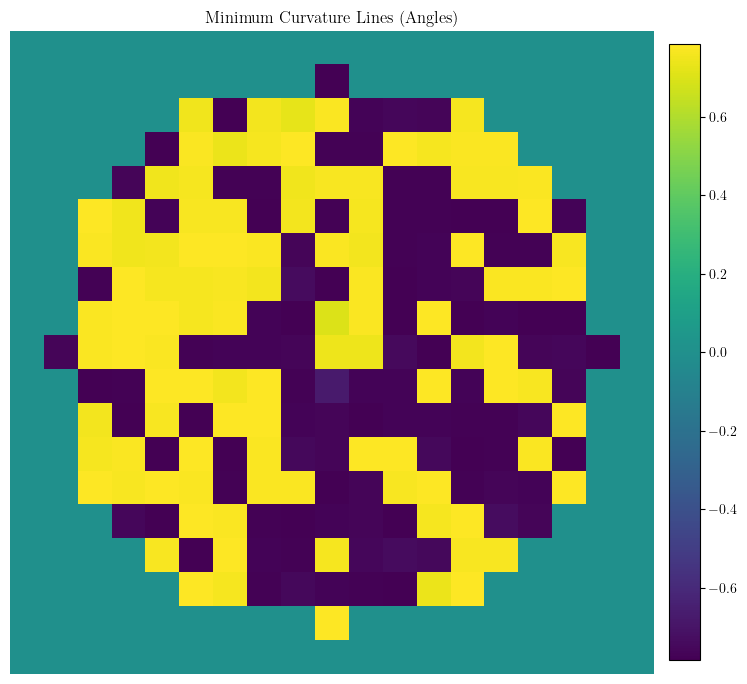

In [70]:
plt.figure(figsize=(10, 10))
im = plt.imshow(mat_Angles, cmap='viridis') 
cbar = plt.colorbar(im, shrink=0.8, pad=0.02) 
plt.title("Minimum Curvature Lines (Angles)")
plt.axis('off')

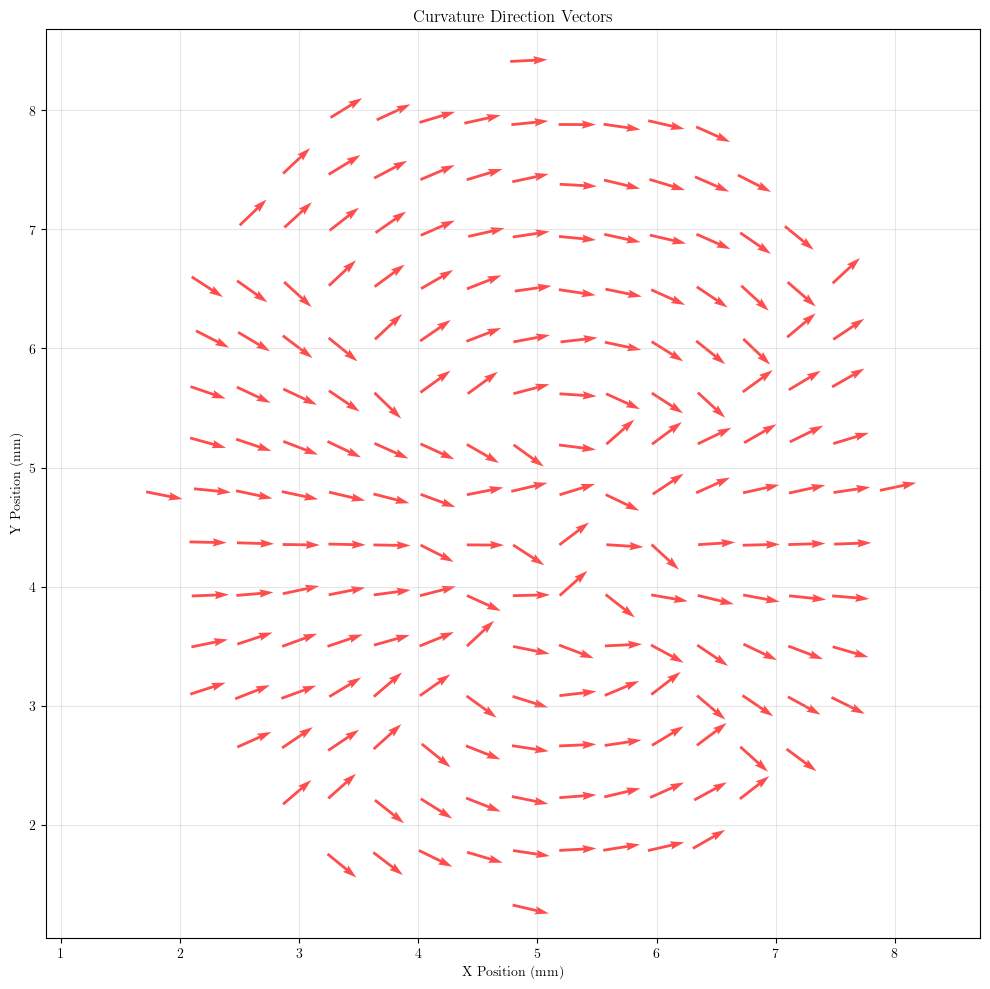

Curvature vector plot saved as 'curvature_vectors.png'


In [71]:
# --- Assume mat_R_X, mat_R_Y, mat_R_X_hpref, mat_R_Y_hpref are 19x19 arrays ---

# Your existing setup
ro = 0.4 #mm
R = 7.78

# Initialize arrays to store positions and vector components
x_positions = []
y_positions = []
u_components = []  # x-component of vectors
v_components = []  # y-component of vectors

# Initialize the matrix to store angles (assuming 19x19)
mat_Angles = np.zeros((19, 19))

for ii in range(1, 18):
    for jj in range(1, 18):
        x_looking = (mat_R_X[ii-1][jj] != 0 and mat_R_X[ii+1][jj] != 0 and 
                     mat_R_X[ii][jj+1] != 0 and mat_R_X[ii][jj-1] != 0)
        y_looking = (mat_R_Y[ii-1][jj] != 0 and mat_R_Y[ii+1][jj] != 0 and 
                     mat_R_Y[ii][jj+1] != 0 and mat_R_Y[ii][jj-1] != 0)
        
        if ((mat_R_X[ii][jj] != 0 and mat_R_Y[ii][jj] != 0) and x_looking and y_looking):
            center_x_coord = mat_R_X_hpref[ii][jj]
            
            # X-gradient deltas (all 4 directions)
            delta_x_a = mat_R_X[ii+1][jj] - mat_R_X_hpref[ii+1][jj]  # (y+1)
            delta_x_b = mat_R_X[ii][jj+1] - mat_R_X_hpref[ii][jj+1]  # (x+1)
            delta_x_c = mat_R_X[ii-1][jj] - mat_R_X_hpref[ii-1][jj]  # (y-1)
            delta_x_d = mat_R_X[ii][jj-1] - mat_R_X_hpref[ii][jj-1]  # (x-1)

            center_y_coord = mat_R_Y[ii][jj]
            
            # Y-gradient deltas (all 4 directions)
            delta_y_a = mat_R_Y[ii+1][jj] - mat_R_Y_hpref[ii+1][jj]  # (y+1)
            delta_y_b = mat_R_Y[ii][jj+1] - mat_R_Y_hpref[ii][jj+1]  # (x+1)
            delta_y_c = mat_R_Y[ii-1][jj] - mat_R_Y_hpref[ii-1][jj]  # (y-1) <-- *** THIS IS THE NEW, REQUIRED LINE ***
            delta_y_d = mat_R_Y[ii][jj-1] - mat_R_Y_hpref[ii][jj-1]  # (x-1)

            # --- *** START: CORRECTED ANGLE CALCULATION *** ---
            
            # 1. Calculate the second derivative terms
            # S_xx = (change in x-grad) / (change in x)
            S_xx_term = delta_x_b - delta_x_d 

            # S_yy = (change in y-grad) / (change in y)
            S_yy_term = delta_y_a - delta_y_c

            # S_xy = (change in x-grad)/(change in y) + (change in y-grad)/(change in x)
            # We average the two estimations for S_xy for a more robust result
            S_xy_term = delta_x_a - delta_x_c
            S_yx_term = delta_y_b - delta_y_d
            S_xy_avg_term = (S_xy_term + S_yx_term) / 2.0 

            # 2. Build the formula: tan(2*theta) = 2*S_xy / (S_xx - S_yy)
            numerator = 2.0 * S_xy_avg_term
            denominator = S_xx_term - S_yy_term

            # 3. Calculate angle with safety check for division by zero
            if np.abs(denominator) < 1e-9:
                # Point is spherical (no astigmatism), angle is 0 or undefined.
                angle = 0.0
            else:
                A = numerator / denominator
                angle = 0.5 * np.arctan(A)
            
            # --- *** END: CORRECTED ANGLE CALCULATION *** ---
            
            mat_Angles[ii][jj] = angle
            
            # Store positions and vector components for plotting
            x_positions.append(center_x_coord)
            y_positions.append(center_y_coord)
            u_components.append(np.cos(angle))  # x-component of unit vector
            v_components.append(np.sin(angle))  # y-component of unit vector

# Convert to numpy arrays for plotting
x_positions = np.array(x_positions)
y_positions = np.array(y_positions)
u_components = np.array(u_components)
v_components = np.array(v_components)

# Create the vector plot
plt.figure(figsize=(10, 10)) # Made figure square
plt.quiver(x_positions, y_positions, u_components, v_components, 
           angles='xy', scale_units='xy', scale=3.2, 
           color='red', alpha=0.7, width=0.003)

# Customize the plot
plt.xlabel('X Position (mm)')
plt.ylabel('Y Position (mm)')
plt.title('Curvature Direction Vectors')
plt.grid(True, alpha=0.3)
plt.axis('equal')  # Important for proper aspect ratio

plt.tight_layout()
plt.savefig('curvature_vectors.png', dpi=300)
plt.show()

print("Curvature vector plot saved as 'curvature_vectors.png'")

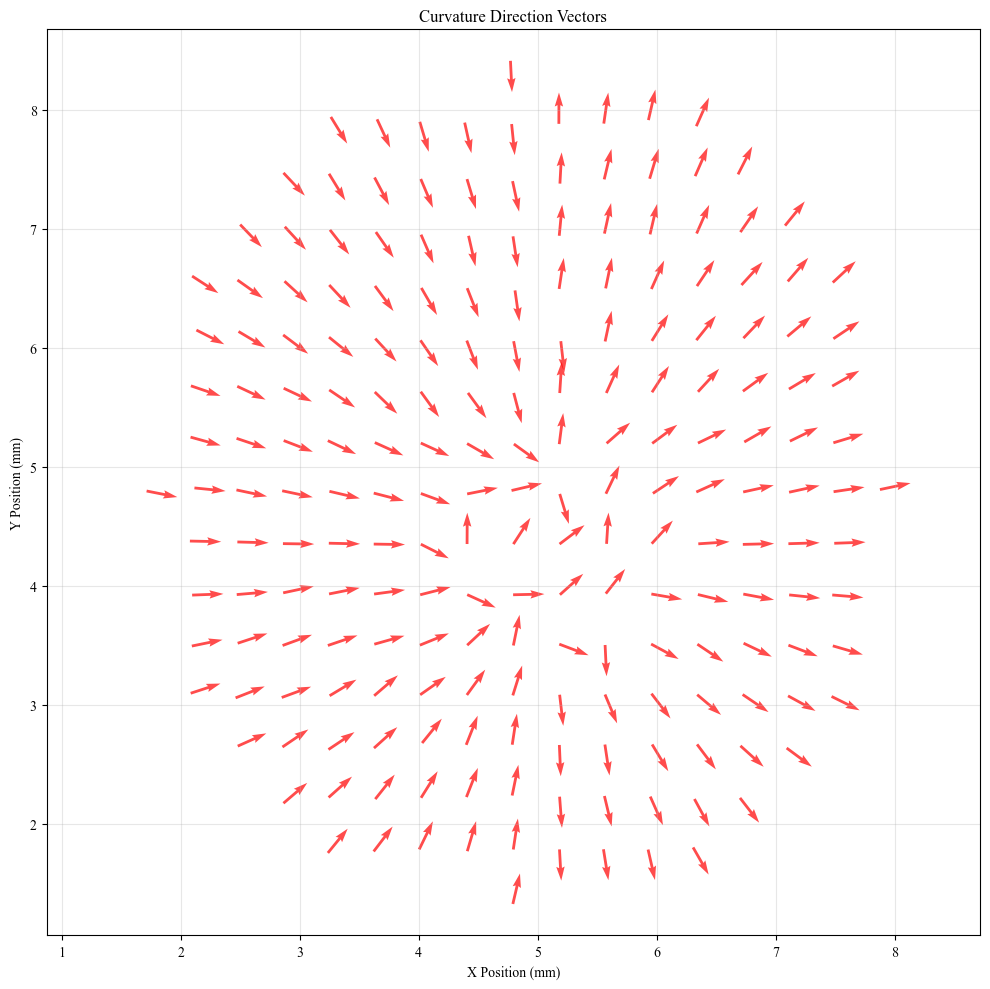

In [91]:
# --- Assume mat_R_X, mat_R_Y, mat_R_X_hpref, mat_R_Y_hpref are 19x19 arrays ---

# Your existing setup
ro = 0.4 #mm
R = 7.78

# Initialize arrays to store positions and vector components
x_positions = []
y_positions = []
u_components = []  # x-component of vectors
v_components = []  # y-component of vectors

# Initialize the matrix to store angles (assuming 19x19)
mat_Angles = np.zeros((19, 19))

for ii in range(1, 18):
    for jj in range(1, 18):
        x_looking = (mat_R_X[ii-1][jj] != 0 and mat_R_X[ii+1][jj] != 0 and 
                     mat_R_X[ii][jj+1] != 0 and mat_R_X[ii][jj-1] != 0)
        y_looking = (mat_R_Y[ii-1][jj] != 0 and mat_R_Y[ii+1][jj] != 0 and 
                     mat_R_Y[ii][jj+1] != 0 and mat_R_Y[ii][jj-1] != 0)
        
        if ((mat_R_X[ii][jj] != 0 and mat_R_Y[ii][jj] != 0) and x_looking and y_looking):
            center_x_coord = mat_R_X_hpref[ii][jj]
            
            # X-gradient deltas
            delta_x_a = mat_R_X[ii+1][jj] - mat_R_X_hpref[ii+1][jj]  # (y+1)
            delta_x_b = mat_R_X[ii][jj+1] - mat_R_X_hpref[ii][jj+1]  # (x+1)
            delta_x_c = mat_R_X[ii-1][jj] - mat_R_X_hpref[ii-1][jj]  # (y-1)
            delta_x_d = mat_R_X[ii][jj-1] - mat_R_X_hpref[ii][jj-1]  # (x-1)

            center_y_coord = mat_R_Y[ii][jj]
            
            # Y-gradient deltas
            delta_y_a = mat_R_Y[ii+1][jj] - mat_R_Y_hpref[ii+1][jj]  # (y+1)
            delta_y_b = mat_R_Y[ii][jj+1] - mat_R_Y_hpref[ii][jj+1]  # (x+1)
            delta_y_c = mat_R_Y[ii-1][jj] - mat_R_Y_hpref[ii-1][jj]  # (y-1) 
            delta_y_d = mat_R_Y[ii][jj-1] - mat_R_Y_hpref[ii][jj-1]  # (x-1)

            # --- *** START: CORRECTED ANGLE CALCULATION *** ---
            
            # 1. Calculate the second derivative terms
            S_xx_term = delta_x_b - delta_x_d 
            S_yy_term = delta_y_a - delta_y_c
            
            S_xy_term = delta_x_a - delta_x_c
            S_yx_term = delta_y_b - delta_y_d
            S_xy_avg_term = (S_xy_term + S_yx_term) / 2.0 

            # 2. Build the formula: tan(2*theta) = 2*S_xy / (S_xx - S_yy)
            numerator = 2.0 * S_xy_avg_term
            denominator = S_xx_term - S_yy_term

            # 3. Calculate angle using np.arctan2
            # This is the corrected line. It replaces the entire if/else block.
            # It correctly finds the angle 2*theta in the full -pi to +pi range,
            # so the final 'angle' is in the -pi/2 to +pi/2 range.
            angle = 0.5 * np.arctan2(numerator, denominator)
            
            # --- *** END: CORRECTED ANGLE CALCULATION *** ---
            
            mat_Angles[ii][jj] = angle
            
            # Store positions and vector components for plotting
            x_positions.append(center_x_coord)
            y_positions.append(center_y_coord)
            u_components.append(np.cos(angle))  # x-component of unit vector
            v_components.append(np.sin(angle))  # y-component of unit vector

# --- (Rest of your plotting code is correct) ---

# Convert to numpy arrays for plotting
x_positions = np.array(x_positions)
y_positions = np.array(y_positions)
u_components = np.array(u_components)
v_components = np.array(v_components)

# Create the vector plot
plt.figure(figsize=(10, 10))
plt.quiver(x_positions, y_positions, u_components, v_components, 
           angles='xy', scale_units='xy', scale=3.8, 
           color='red', alpha=0.7, width=0.003)

# Customize the plot
plt.xlabel('X Position (mm)')
plt.ylabel('Y Position (mm)')
plt.title('Curvature Direction Vectors')
plt.grid(True, alpha=0.3)
plt.axis('equal') 

plt.tight_layout()
plt.savefig('curvature_vectors_corrected.png', dpi=300)
plt.show()


<h1><center><b>Focus error (S)</b><center></h1>

In [73]:
mat_S = np.zeros((19,19))

In [74]:
ro = 0.4 #We passed from milimeters to meters
R = 7.78 #We passed from milimeters to meters
for ii in range(1,18): #This limits were stablished in order to avoid violating the range in which the matrix is defined
    for jj in range(1,18):
        x_looking = mat_R_X[ii-1][jj] != 0 and mat_R_X[ii+1][jj]!=0 and mat_R_X[ii][jj+1]!=0 and mat_R_X[ii][jj-1]!=0
        y_looking = mat_R_Y[ii-1][jj] != 0 and mat_R_Y[ii+1][jj]!=0 and mat_R_Y[ii][jj+1]!=0 and mat_R_Y[ii][jj-1]!=0
        if ((mat_R_X[ii][jj]!=0 and mat_R_Y[ii][jj]!= 0) and x_looking and y_looking):
            center_x_coord = mat_R_X_hpref[ii][jj]
            delta_x_a = mat_R_X[ii][jj+1] - mat_R_X_hpref[ii][jj+1]
            delta_x_b = mat_R_X[ii+1][jj] - mat_R_X_hpref[ii+1][jj]
            delta_x_c = mat_R_X[ii][jj-1] - mat_R_X_hpref[ii][jj-1]
            delta_x_d = mat_R_X[ii-1][jj] - mat_R_X_hpref[ii-1][jj]

            center_y_coord = mat_R_Y[ii][jj]
            delta_y_a = mat_R_Y[ii][jj+1] - mat_R_Y_hpref[ii][jj+1]
            delta_y_b = mat_R_Y[ii-1][jj] - mat_R_Y_hpref[ii-1][jj]
            delta_y_d = mat_R_Y[ii+1][jj] - mat_R_Y_hpref[ii+1][jj]

            
            S = (1/(4*ro*R))*(delta_x_a - delta_x_c + delta_y_b - delta_y_d + mat_C[ii][jj])


            mat_S[ii][jj] = S*1e-3

(-0.5, 18.5, 18.5, -0.5)

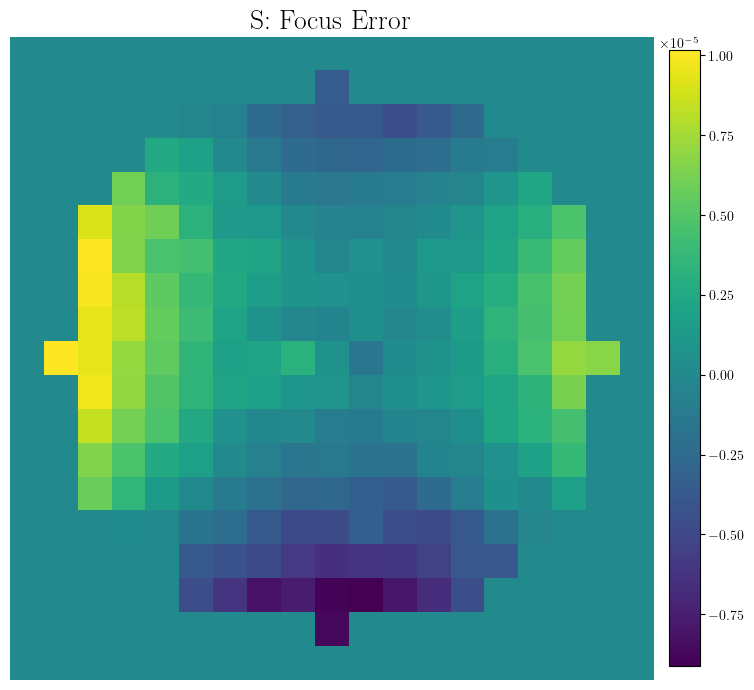

In [75]:
plt.figure(figsize=(10, 10))
im = plt.imshow(mat_S) 
cbar = plt.colorbar(im, shrink=0.8, pad=0.02) 
plt.title("S: Focus Error", fontsize=20)
plt.axis('off')

In [76]:
mat_C_max = np.zeros((19,19))
mat_C_min = np.zeros((19,19))

In [77]:
# R = 7-78 #We passed from milimeters to meters
# for ii in range(1,18): #This limits were stablished in order to avoid violating the range in which the matrix is defined
#     for jj in range(1,18):
#         x_looking = mat_R_X[ii-1][jj] != 0 and mat_R_X[ii+1][jj]!=0 and mat_R_X[ii][jj+1]!=0 and mat_R_X[ii][jj-1]!=0
#         y_looking = mat_R_Y[ii-1][jj] != 0 and mat_R_Y[ii+1][jj]!=0 and mat_R_Y[ii][jj+1]!=0 and mat_R_Y[ii][jj-1]!=0
#         if ((mat_R_X[ii][jj]!=0 and mat_R_Y[ii][jj]!= 0) and x_looking and y_looking):

#             c_max = (1/R)*1.0 + mat_S[ii][jj] + mat_C[ii][jj]
#             c_min = (1/R)*1.0 + mat_S[ii][jj]
            
#             mat_C_min[ii][jj] = c_min
#             mat_C_max[ii][jj] = c_max

R = 7.78  # Fixed the R value

for ii in range(1, 18):
    for jj in range(1, 18):
        x_looking = (mat_R_X[ii-1][jj] != 0 and mat_R_X[ii+1][jj] != 0 and 
                    mat_R_X[ii][jj+1] != 0 and mat_R_X[ii][jj-1] != 0)
        y_looking = (mat_R_Y[ii-1][jj] != 0 and mat_R_Y[ii+1][jj] != 0 and 
                    mat_R_Y[ii][jj+1] != 0 and mat_R_Y[ii][jj-1] != 0)
        
        if ((mat_R_X[ii][jj] != 0 and mat_R_Y[ii][jj] != 0) and x_looking and y_looking):
            # First, compute the tensor components δ_xx, δ_yy, δ_xy, etc.
            delta_x_a = mat_R_X[ii][jj+1] - mat_R_X_hpref[ii][jj+1]
            delta_x_b = mat_R_X[ii+1][jj] - mat_R_X_hpref[ii+1][jj]
            delta_x_c = mat_R_X[ii][jj-1] - mat_R_X_hpref[ii][jj-1]
            delta_x_d = mat_R_X[ii-1][jj] - mat_R_X_hpref[ii-1][jj]

            center_y_coord = mat_R_Y[ii][jj]
            delta_y_a = mat_R_Y[ii][jj+1] - mat_R_Y_hpref[ii][jj+1]
            delta_y_b = mat_R_Y[ii-1][jj] - mat_R_Y_hpref[ii-1][jj]
            delta_y_c = mat_R_Y[ii][jj-1] - mat_R_Y_hpref[ii][jj-1]
            delta_y_d = mat_R_Y[ii+1][jj] - mat_R_Y_hpref[ii+1][jj]

            # Compute the tensor components
            δ_xx = (delta_x_a - delta_x_c) / (2 * ro * R)
            δ_yy = (delta_y_b - delta_y_d) / (2 * ro * R)
            δ_xy = (delta_x_b - delta_x_d + delta_y_a - delta_y_c) / (4 * ro * R)
            
            # Compute C (magnitude)
            C = ((δ_xx - δ_yy)**2 + (2 * δ_xy)**2)**0.5
            
            # Compute S (spherical component)
            S = -1/2 * (δ_xx + δ_yy + C)
            
            # Now compute maximum and minimum curvatures
            c_max = (1/R) + S + C
            c_min = (1/R) + S
            
            mat_C_min[ii][jj] = c_min
            mat_C_max[ii][jj] = c_max

C:\Users\PC\AppData\Local\Temp\ipykernel_1092\2116688422.py:2: RuntimeWarning: divide by zero encountered in divide
  im = plt.imshow(1/mat_C_max)


(-0.5, 18.5, 18.5, -0.5)

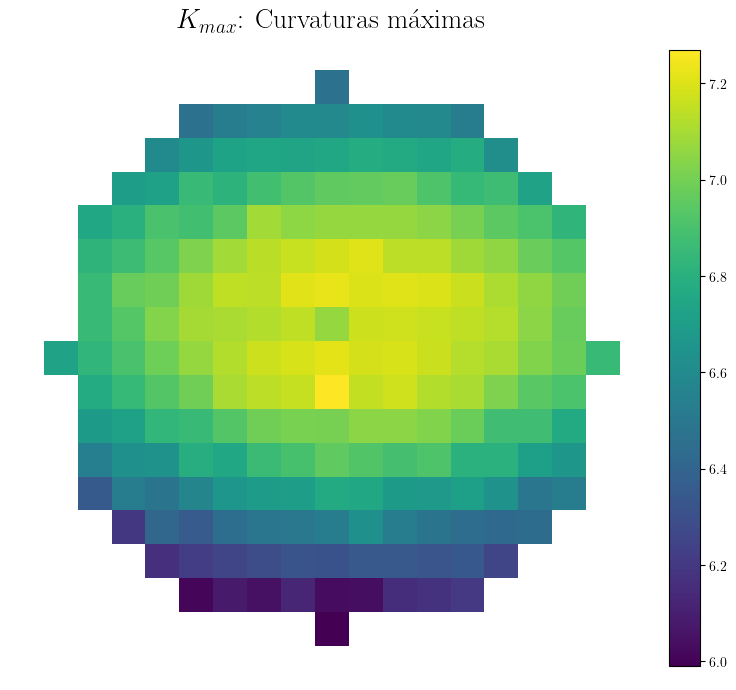

In [78]:
plt.figure(figsize=(10, 10))
im = plt.imshow(1/mat_C_max) 
cbar = plt.colorbar(im, shrink=0.8, pad=0.02) 
plt.title(r"$K_{max}$: Curvaturas máximas", fontsize=20)
plt.axis('off')

C:\Users\PC\AppData\Local\Temp\ipykernel_1092\344796321.py:2: RuntimeWarning: divide by zero encountered in divide
  im = plt.imshow(1/mat_C_min)


(-0.5, 18.5, 18.5, -0.5)

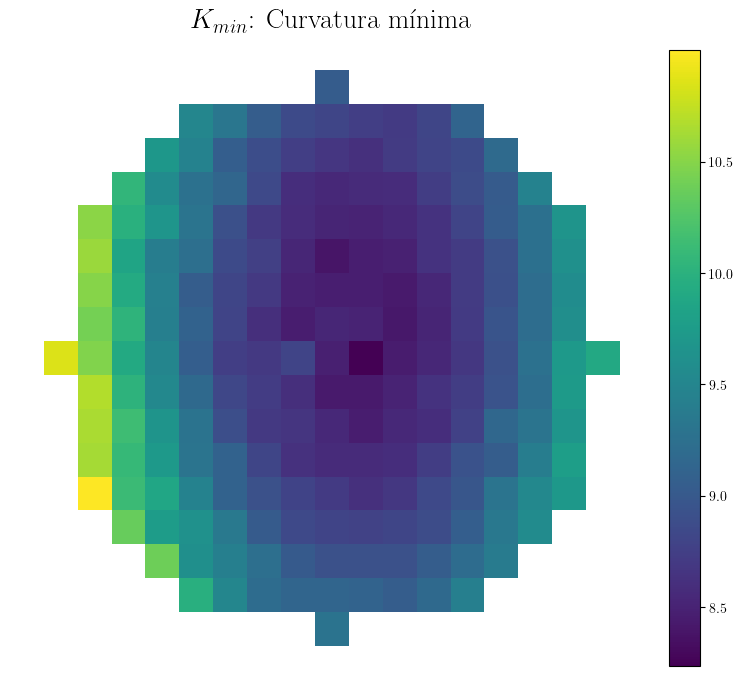

In [79]:
plt.figure(figsize=(10, 10))
im = plt.imshow(1/mat_C_min) 
cbar = plt.colorbar(im, shrink=0.8, pad=0.02) 
plt.title(r"$K_{min}$: Curvatura mínima", fontsize=20)
plt.axis('off')

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Disable LaTeX to avoid errors
plt.rcParams['text.usetex'] = False

def compute_elevation_discrete(mat_R_X, mat_R_Y, mat_R_X_hpref, mat_R_Y_hpref, R, ρ=0.4):
    """
    Compute elevation for each discrete point in the 19x19 grid
    """
    N = 19
    Δh = np.zeros((N, N))
    
    # Convert to numpy arrays
    R_X = np.array(mat_R_X)
    R_Y = np.array(mat_R_Y)
    R_X_hpref = np.array(mat_R_X_hpref)
    R_Y_hpref = np.array(mat_R_Y_hpref)
    
    # Calculate displacements
    delta_x_mat = R_X - R_X_hpref
    delta_y_mat = R_Y - R_Y_hpref
    
    # Simple integration from center outward
    center_i, center_j = N//2, N//2
    Δh[center_i, center_j] = 0
    
    # For each point, compute elevation relative to neighbors
    for i in range(N):
        for j in range(N):
            if (i, j) == (center_i, center_j):
                continue
                
            # Use available neighbors for integration
            valid_neighbors = []
            
            # Check left neighbor
            if j > 0 and delta_x_mat[i, j-1] != 0 and delta_x_mat[i, j] != 0:
                Δh_left = Δh[i, j-1] + (1/R) * (
                    4 * (delta_x_mat[i, j-1] + delta_x_mat[i, j]) * ρ +
                    (1/3) * (delta_y_mat[i, j-1] + delta_y_mat[i, j]) * ρ
                )
                valid_neighbors.append(Δh_left)
            
            # Check right neighbor  
            if j < N-1 and delta_x_mat[i, j+1] != 0 and delta_x_mat[i, j] != 0:
                Δh_right = Δh[i, j+1] + (1/R) * (
                    4 * (delta_x_mat[i, j+1] + delta_x_mat[i, j]) * ρ +
                    (1/3) * (delta_y_mat[i, j+1] + delta_y_mat[i, j]) * ρ
                )
                valid_neighbors.append(Δh_right)
            
            # Check bottom neighbor
            if i > 0 and delta_x_mat[i-1, j] != 0 and delta_x_mat[i, j] != 0:
                Δh_bottom = Δh[i-1, j] + (1/R) * (
                    4 * (delta_x_mat[i-1, j] + delta_x_mat[i, j]) * ρ +
                    (1/3) * (delta_y_mat[i-1, j] + delta_y_mat[i, j]) * ρ
                )
                valid_neighbors.append(Δh_bottom)
            
            # Check top neighbor
            if i < N-1 and delta_x_mat[i+1, j] != 0 and delta_x_mat[i, j] != 0:
                Δh_top = Δh[i+1, j] + (1/R) * (
                    4 * (delta_x_mat[i+1, j] + delta_x_mat[i, j]) * ρ +
                    (1/3) * (delta_y_mat[i+1, j] + delta_y_mat[i, j]) * ρ
                )
                valid_neighbors.append(Δh_top)
            
            # Use average of available neighbors
            if valid_neighbors:
                Δh[i, j] = np.mean(valid_neighbors)
    
    return Δh

# Compute elevation
ρ = 0.4
R = 7.78
Δh = compute_elevation_discrete(mat_R_X, mat_R_Y, mat_R_X_hpref, mat_R_Y_hpref, R, ρ)

# Get the coordinates for each point
X_points = np.array(mat_R_X_hpref)
Y_points = np.array(mat_R_Y_hpref)

# Create 3D scatter plot of discrete points
# fig = plt.figure(figsize=(12, 10))

# # 3D Scatter plot
# ax1 = fig.add_subplot(221, projection='3d')
# scatter1 = ax1.scatter(X_points, Y_points, Δh, c=Δh, cmap='viridis', s=50)
# ax1.set_title('3D Discrete Points - Elevation Map')
# ax1.set_xlabel('X Position (mm)')
# ax1.set_ylabel('Y Position (mm)')
# ax1.set_zlabel('Elevation Δh (mm)')
# plt.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=20, label='Δh (mm)')

# # Add grid lines to show the tiles
# for i in range(19):
#     for j in range(19):
#         if Δh[i, j] != 0:  # Only plot if we have data
#             ax1.plot([X_points[i, j]], [Y_points[i, j]], [Δh[i, j]], 
#                     'o', markersize=5, color=plt.cm.viridis((Δh[i, j] - Δh.min()) / (Δh.max() - Δh.min())))

# # 2D Scatter plot (top view)
# ax2 = fig.add_subplot(222)
# scatter2 = ax2.scatter(X_points, Y_points, c=Δh, cmap='viridis', s=100)
# ax2.set_title('2D Top View - Elevation Map')
# ax2.set_xlabel('X Position (mm)')
# ax2.set_ylabel('Y Position (mm)')
# plt.colorbar(scatter2, ax=ax2, label='Δh (mm)')

# # Add grid lines in 2D
# ax2.grid(True, alpha=0.3)
# for i in range(19):
#     for j in range(19):
#         if Δh[i, j] != 0:
#             ax2.text(X_points[i, j], Y_points[i, j], f'{Δh[i, j]:.3f}', 
#                     fontsize=6, ha='center', va='center')

# # Wireframe with points
# ax3 = fig.add_subplot(223, projection='3d')
# # Plot the grid
# for i in range(19):
#     for j in range(19):
#         if Δh[i, j] != 0:
#             ax3.scatter(X_points[i, j], Y_points[i, j], Δh[i, j], 
#                        c=Δh[i, j], cmap='viridis', s=80)
            
# # Connect points with lines to show the grid structure
# for i in range(19):
#     for j in range(18):
#         if Δh[i, j] != 0 and Δh[i, j+1] != 0:
#             ax3.plot([X_points[i, j], X_points[i, j+1]], 
#                     [Y_points[i, j], Y_points[i, j+1]], 
#                     [Δh[i, j], Δh[i, j+1]], 'gray', alpha=0.3)

# for i in range(18):
#     for j in range(19):
#         if Δh[i, j] != 0 and Δh[i+1, j] != 0:
#             ax3.plot([X_points[i, j], X_points[i+1, j]], 
#                     [Y_points[i, j], Y_points[i+1, j]], 
#                     [Δh[i, j], Δh[i+1, j]], 'gray', alpha=0.3)

# ax3.set_title('3D Grid with Connections')
# ax3.set_xlabel('X Position (mm)')
# ax3.set_ylabel('Y Position (mm)')
# ax3.set_zlabel('Elevation Δh (mm)')

# # Simple bar chart style
# ax4 = fig.add_subplot(224, projection='3d')
# for i in range(19):
#     for j in range(19):
#         if Δh[i, j] != 0:
#             ax4.bar3d(X_points[i, j], Y_points[i, j], 0, 
#                      0.3, 0.3, Δh[i, j], 
#                      color=plt.cm.viridis((Δh[i, j] - Δh.min()) / (Δh.max() - Δh.min())),
#                      alpha=0.7)

# ax4.set_title('3D Bars - Elevation Height')
# ax4.set_xlabel('X Position (mm)')
# ax4.set_ylabel('Y Position (mm)')
# ax4.set_zlabel('Elevation Δh (mm)')

# plt.tight_layout()
# plt.show()

# # Print the elevation matrix
# print("Elevation Matrix (19×19):")
# print("Rows: 0-18, Columns: 0-18")
# print("Format: Δh[i,j] in mm")
# print("\nMatrix values:")
# for i in range(19):
#     row = []
#     for j in range(19):
#         if Δh[i, j] == 0:
#             row.append("  0.000  ")
#         else:
#             row.append(f"{Δh[i, j]:8.6f}")
#     print(f"Row {i:2}: {row}")

# print(f"\nStatistics:")
# print(f"Non-zero points: {np.count_nonzero(Δh)} out of {19*19}")
# print(f"Max elevation: {np.max(Δh):.6f} mm at position {np.unravel_index(np.argmax(Δh), Δh.shape)}")
# print(f"Min elevation: {np.min(Δh):.6f} mm at position {np.unravel_index(np.argmin(Δh), Δh.shape)}")

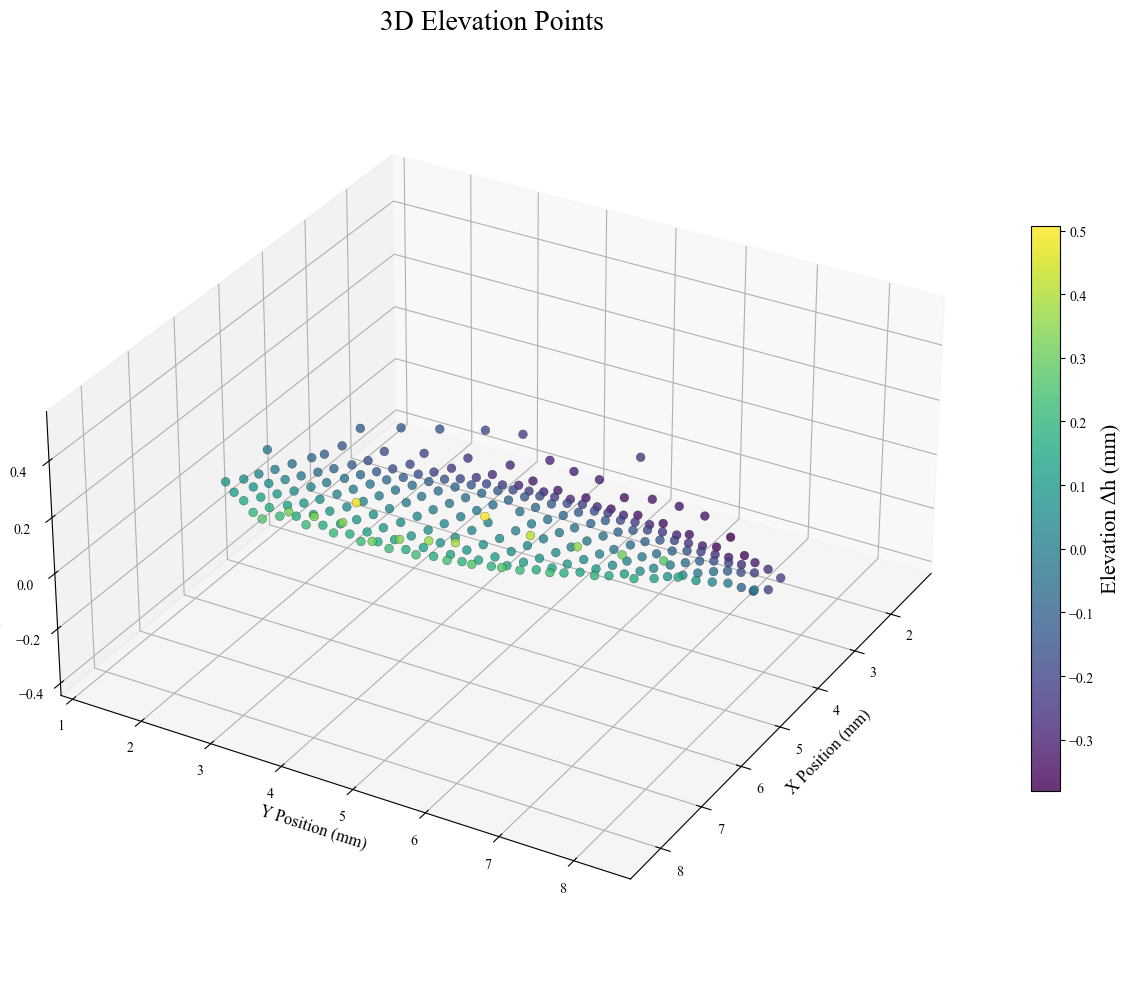

In [81]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Collect all valid points
x_vals = []
y_vals = []
z_vals = []

for i in range(19):
    for j in range(19):
        if Δh[i, j] != 0:
            x_vals.append(X_points[i, j])
            y_vals.append(Y_points[i, j])
            z_vals.append(Δh[i, j])

# Plot points
scatter = ax.scatter(x_vals, y_vals, z_vals, 
                    c=z_vals, cmap='viridis', s=40, 
                    alpha=0.8, edgecolors='black', linewidth=0.2)

# Customize the view
ax.set_title('3D Elevation Points', fontsize=20)
ax.set_xlabel('X Position (mm)', fontsize=12)
ax.set_ylabel('Y Position (mm)', fontsize=12)
ax.set_zlabel('Elevation Δh (mm)', fontsize=12)

# Add grid for better spatial reference
ax.grid(True, alpha=0.3)

ax.view_init(elev=30, azim=30)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6, aspect=20)
cbar.set_label('Elevation Δh (mm)', fontsize=16)

# Set equal aspect ratio for better visualization
ax.set_box_aspect([1, 1, 0.5])  # Adjust the z-axis scaling

plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_1092\3807175794.py:42: RuntimeWarning: divide by zero encountered in divide
  im4 = ax4.imshow(1 / mat_C_max)
C:\Users\PC\AppData\Local\Temp\ipykernel_1092\3807175794.py:49: RuntimeWarning: divide by zero encountered in divide
  im5 = ax5.imshow(1 / mat_C_min)


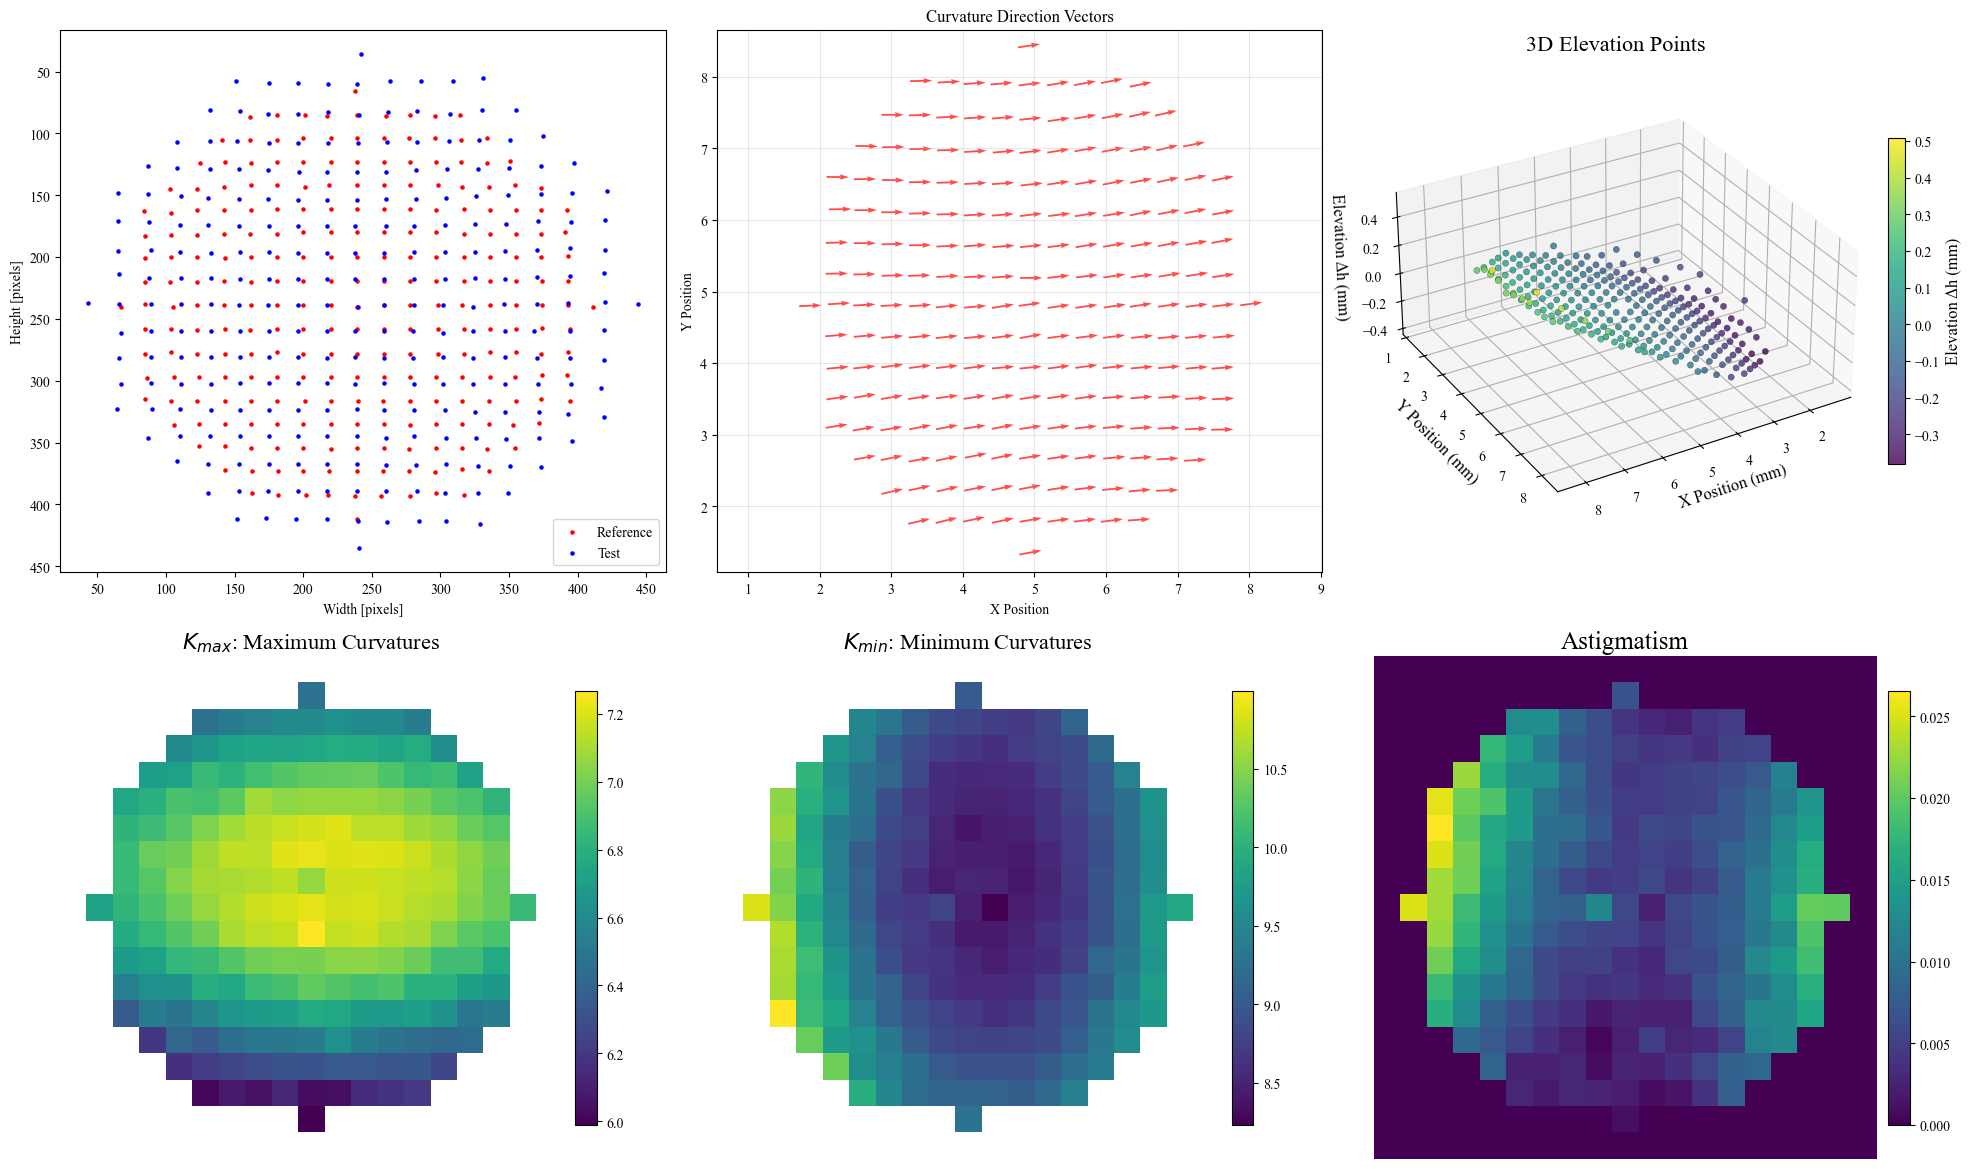

In [82]:
fig = plt.figure(figsize=(20, 12))

# === (1,1) Scatter Comparison ===
ax1 = fig.add_subplot(2, 3, 1)
ax1.scatter(y1, x1, c="red", s=5, label="Reference")
ax1.scatter(x2, y2, c="blue", s=5, label="Test")
ax1.set_xlabel('Width [pixels]')
ax1.set_ylabel('Height [pixels]')
ax1.legend(fontsize=10, loc="lower right")
ax1.invert_yaxis()

# === (1,2) Quiver (Vector Field) ===
ax2 = fig.add_subplot(2, 3, 2)
ax2.quiver(x_positions, y_positions, u_components, v_components,
           angles='xy', scale_units='xy', scale=3.2,
           color='red', alpha=0.7, width=0.003)
ax2.set_xlabel('X Position')
ax2.set_ylabel('Y Position')
ax2.set_title('Curvature Direction Vectors')
ax2.grid(True, alpha=0.3)
ax2.axis('equal')

# === (1,3) 3D Scatter ===
ax3 = fig.add_subplot(2, 3, 3, projection='3d')
scatter = ax3.scatter(x_vals, y_vals, z_vals,
                      c=z_vals, cmap='viridis', s=20,
                      alpha=0.8, edgecolors='black', linewidth=0.2)
ax3.set_title('3D Elevation Points', fontsize=16)
ax3.set_xlabel('X Position (mm)', fontsize=12)
ax3.set_ylabel('Y Position (mm)', fontsize=12)
ax3.set_zlabel('Elevation Δh (mm)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.view_init(elev=30, azim=60)
ax3.set_box_aspect([1, 1, 0.5])

# Colorbar for 3D scatter
cbar3 = fig.colorbar(scatter, ax=ax3, shrink=0.6, aspect=20)
cbar3.set_label('Elevation Δh (mm)', fontsize=12)

# === (2,1) Kmax ===
ax4 = fig.add_subplot(2, 3, 4)
im4 = ax4.imshow(1 / mat_C_max)
cbar4 = fig.colorbar(im4, ax=ax4, shrink=0.8, pad=0.02)
ax4.set_title(r"$K_{max}$: Maximum Curvatures", fontsize=16)
ax4.axis('off')

# === (2,2) Kmin ===
ax5 = fig.add_subplot(2, 3, 5)
im5 = ax5.imshow(1 / mat_C_min)
cbar5 = fig.colorbar(im5, ax=ax5, shrink=0.8, pad=0.02)
ax5.set_title(r"$K_{min}$: Minimum Curvatures", fontsize=16)
ax5.axis('off')

# === (2,3) Astigmatism ===
ax6 = fig.add_subplot(2, 3, 6)
im6 = ax6.imshow(mat_C, cmap="viridis")
cbar6 = fig.colorbar(im6, ax=ax6, shrink=0.8, pad=0.02)
ax6.set_title("Astigmatism", fontsize=18)
ax6.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

<h1><center><b> Campbell

In [83]:
nr, nc = 19,19
p = 0.4 #mm
SbarX = np.zeros((nr,nc))
SbarY = np.zeros((nr,nc))
valid = np.zeros((19, 19))
Cx = np.zeros((nr,nc))

In [84]:
for ii in range(1,18): #This limits were stablished in order to avoid violating the range in which the matrix is defined
    for jj in range(1,18):
        x_looking = mat_R_X[ii][jj] != 0 and mat_R_X[ii+1][jj]!=0 and mat_R_X[ii][jj+1]!=0 and mat_R_X[ii+1][jj+1]!=0
        y_looking = mat_R_Y[ii][jj] != 0 and mat_R_Y[ii+1][jj]!=0 and mat_R_Y[ii][jj+1]!=0 and mat_R_Y[ii+1][jj+1]!=0
        if ((mat_R_X[ii][jj]!=0 and mat_R_Y[ii][jj]!= 0) and x_looking and y_looking):

            valid[ii][jj] = 1

            center_x_coord = mat_R_X_hpref[ii][jj]
            delta_x_a = mat_R_X[ii][jj+1] - mat_R_X_hpref[ii][jj+1]
            delta_x_b = mat_R_X[ii+1][jj] - mat_R_X_hpref[ii+1][jj]
            delta_x_c = mat_R_X[ii][jj-1] - mat_R_X_hpref[ii][jj-1]
            delta_x_d = mat_R_X[ii-1][jj] - mat_R_X_hpref[ii-1][jj]

            center_y_coord = mat_R_Y[ii][jj]
            delta_y_a = mat_R_Y[ii][jj+1] - mat_R_Y_hpref[ii][jj+1]
            delta_y_b = mat_R_Y[ii-1][jj] - mat_R_Y_hpref[ii-1][jj]
            delta_y_c = mat_R_Y[ii][jj-1] - mat_R_Y_hpref[ii][jj-1]
            delta_y_d = mat_R_Y[ii+1][jj] - mat_R_Y_hpref[ii+1][jj]

            SbarX[ii][jj] = 0.25 * (delta_x_a + delta_x_b + delta_x_c + delta_x_d)
            SbarY[ii][jj] = 0.25 * (delta_y_a + delta_y_b + delta_y_c + delta_y_d)

            Cx[ii][jj] = (1/4*p)*((-delta_x_a - delta_x_b + delta_x_d + delta_x_c ) + ( -1*delta_y_a + delta_y_b + delta_y_d - delta_y_c))
            

In [85]:
Z = np.zeros((nr,nc))
f = np.zeros((nr,nc)) #This track the number of points that each point is computed

#Center
nrc = round(nr/2)
ncc = round(nr/2)

f[nrc,ncc] = 1 #Center point is filled

# Right upper cuadrant

for r in range(nrc, nr - 1):
    for c in range(ncc, nc - 1):
        if valid[r, c] == 1:
            z_ref = Z[r, c]
            s_x = SbarX[r, c]
            s_y = SbarY[r, c]
            c_x_term = (p**2 * Cx[r, c]) / 2.0

            # Calculate elevations for the other 3 corners. Eq ( 19-21 )
            z_new_1 = z_ref + (p * s_x) - c_x_term         # Z(r, c+1)
            z_new_2 = z_ref + (p * s_y) - c_x_term         # Z(r+1, c)
            z_new_3 = z_ref + p * (s_x + s_y)             # Z(r+1, c+1)

            # Update surface Z with running average (Eq. 22) [cite: 282]
            Z[r, c+1] = (f[r, c+1] * Z[r, c+1] + z_new_1) / (f[r, c+1] + 1.0)
            Z[r+1, c] = (f[r+1, c] * Z[r+1, c] + z_new_2) / (f[r+1, c] + 1.0)
            Z[r+1,c+1] = (f[r+1,c+1] * Z[r+1,c+1] + z_new_3) / (f[r+1,c+1] + 1.0)

            # Increment counters
            f[r, c+1] += 1
            f[r+1, c] += 1
            f[r+1, c+1] += 1

# Left upper quadrant

for r in range(nrc, nr - 1):
    for c in range(ncc, 0, -1): # Iterate c from ncc down to 1
        if valid[r, c-1] == 1:
            z_ref = Z[r, c] # Reference corner is (r, c)
            s_x = SbarX[r, c-1]
            s_y = SbarY[r, c-1]
            c_x_term = (p**2 * Cx[r, c-1]) / 2.0

            # Calculate elevations
            z_new_1 = z_ref - (p * s_x) + c_x_term         # Z(r, c-1)
            z_new_2 = z_ref + (p * s_y) + c_x_term         # Z(r+1, c)
            z_new_3 = z_ref - p * (s_x - s_y)             # Z(r+1, c-1)

            # Update surface Z with running average
            Z[r, c-1]   = (f[r, c-1] * Z[r, c-1] + z_new_1) / (f[r, c-1] + 1.0)
            Z[r+1, c]   = (f[r+1, c] * Z[r+1, c] + z_new_2) / (f[r+1, c] + 1.0)
            Z[r+1, c-1] = (f[r+1,c-1] * Z[r+1,c-1] + z_new_3) / (f[r+1,c-1] + 1.0)

            # Increment counters
            f[r, c-1] += 1
            f[r+1, c] += 1
            f[r+1, c-1] += 1

# Left lower quadrant
for r in range(nrc, 0, -1): # Iterate r from nrc down to 1
    for c in range(ncc, 0, -1): # Iterate c from ncc down to 1
        if valid[r-1, c-1] == 1:
            z_ref = Z[r, c] # Reference corner is (r, c)
            s_x = SbarX[r-1, c-1]
            s_y = SbarY[r-1, c-1]
            c_x_term = (p**2 * Cx[r-1, c-1]) / 2.0

            # Calculate elevations
            z_new_1 = z_ref - (p * s_x) - c_x_term         # Z(r, c-1)
            z_new_2 = z_ref - (p * s_y) - c_x_term         # Z(r-1, c)
            z_new_3 = z_ref - p * (s_x + s_y)             # Z(r-1, c-1)

            # Update surface Z with running average
            Z[r, c-1]   = (f[r, c-1] * Z[r, c-1] + z_new_1) / (f[r, c-1] + 1.0)
            Z[r-1, c]   = (f[r-1, c] * Z[r-1, c] + z_new_2) / (f[r-1, c] + 1.0)
            Z[r-1, c-1] = (f[r-1,c-1] * Z[r-1,c-1] + z_new_3) / (f[r-1,c-1] + 1.0)

            # Increment counters
            f[r, c-1] += 1
            f[r-1, c] += 1
            f[r-1, c-1] += 1

# Right lower quadrant
for r in range(nrc, 0, -1): # Iterate r from nrc down to 1
    for c in range(ncc, nc - 1): # Iterate c from ncc to 17
        if valid[r-1, c] == 1:
            z_ref = Z[r, c] # Reference corner is (r, c)
            s_x = SbarX[r-1, c]
            s_y = SbarY[r-1, c]
            c_x_term = (p**2 * Cx[r-1, c]) / 2.0

            # Calculate elevations
            z_new_1 = z_ref + (p * s_x) + c_x_term         # Z(r, c+1)
            z_new_2 = z_ref - (p * s_y) + c_x_term         # Z(r-1, c)
            z_new_3 = z_ref + p * (s_x - s_y)             # Z(r-1, c+1)

            # Update surface Z with running average
            Z[r, c+1]   = (f[r, c+1] * Z[r, c+1] + z_new_1) / (f[r, c+1] + 1.0)
            Z[r-1, c]   = (f[r-1, c] * Z[r-1, c] + z_new_2) / (f[r-1, c] + 1.0)
            Z[r-1, c+1] = (f[r-1,c+1] * Z[r-1,c+1] + z_new_3) / (f[r-1,c+1] + 1.0)
            
            # Increment counters
            f[r, c+1] += 1
            f[r-1, c] += 1
            f[r-1, c+1] += 1


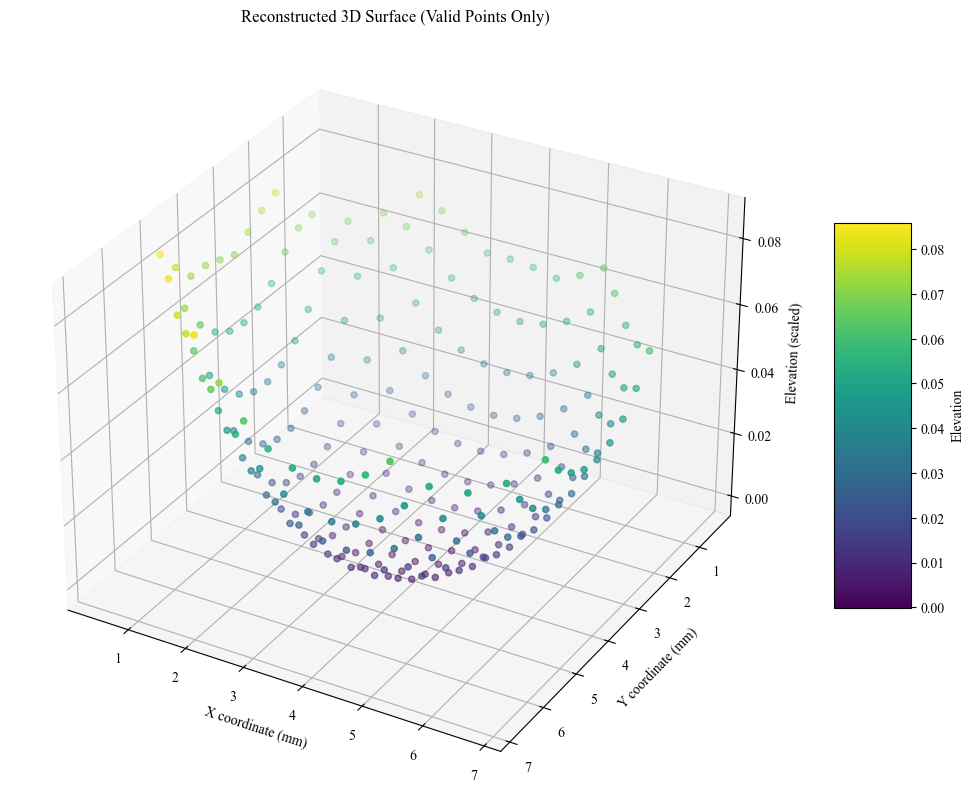

In [86]:
x_axis = np.arange(0, nc) * p
y_axis = np.arange(0, nr) * p

X, Y = np.meshgrid(x_axis, y_axis)

# --- 2. Flatten ALL Data ---
x_flat = X.flatten()
y_flat = Y.flatten()
z_flat = Z.flatten()
f_flat = f.flatten() # Flatten the 'f' (filled) matrix

mask = f_flat > 0


x_valid = x_flat[mask]
y_valid = y_flat[mask]
z_valid = z_flat[mask]

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.scatter(x_valid, y_valid, z_valid/10, c= z_valid/10, cmap='viridis')


ax.invert_xaxis() 

current_xlim = ax.get_xlim()
current_ylim = ax.get_ylim()

# Set the limits in reverse order
ax.set_xlim(current_xlim[1], current_xlim[0])
ax.set_ylim(current_ylim[1], current_ylim[0])

ax.set_xlabel('X coordinate (mm)')
ax.set_ylabel('Y coordinate (mm)')
ax.set_zlabel('Elevation (scaled)') # Added 'scaled'
ax.set_title('Reconstructed 3D Surface (Valid Points Only)')
fig.colorbar(surf, shrink=0.5, aspect=5, label='Elevation')

<h1><b><center> Southwell Method

In [87]:

# # --- 1. PREPARE INPUTS ---
# # (Assumed from your previous code)
# # nr, nc = 19, 19
# # p = 0.4 # Your grid spacing in mm
# # mat_R_X, mat_R_Y, mat_R_X_hpref, mat_R_Y_hpref

# # Create the gradient fields (slopes)
# # Renamed from 'sx' and 'sy' for clarity
# grad_x = mat_R_X - mat_R_X_hpref
# grad_y = mat_R_Y - mat_R_Y_hpref

# # --- 2. PRE-COMPUTATION STEP ---
# # Create the matrix to hold the "Slope Correction Term" from Eq. 3
# # Renamed from 'C' to 'SlopeCorr' to avoid conflict
# SlopeCorr = np.zeros((nr, nc))
# valid_points = np.zeros((nr, nc)) # To track which points can be calculated

# # We can only calculate points that have 4 valid neighbors
# for r in range(1, nr - 1):  # Loop from 1 to 17
#     for c in range(1, nc - 1):  # Loop from 1 to 17
        
#         # Check if the 4 neighbors have data
#         # (Using mat_R_X as a proxy for all data)
#         has_neighbors = (mat_R_X[r-1, c] != 0 and mat_R_X[r+1, c] != 0 and
#                          mat_R_X[r, c-1] != 0 and mat_R_X[r, c+1] != 0)
        
#         if has_neighbors:
#             valid_points[r, c] = 1
            
#             # This is the "slope data" term from Eq. 3
#             # Using 'grad_x' and 'grad_y'
#             term_x = grad_x[r-1, c] - grad_x[r+1, c] # s^x_{i-1,j} - s^x_{i+1,j}
#             term_y = grad_y[r, c-1] - grad_y[r, c+1] # s^y_{i,j-1} - s^y_{i,j+1}
            
#             # Storing in the new 'SlopeCorr' matrix
#             SlopeCorr[r, c] = (p / 8.0) * (term_x + term_y)

# print("Slope correction matrix 'SlopeCorr' computed.")

# # --- 3. ITERATION STEP ---
# # Initialize the Elevation map 'Z' (which the paper calls 'w')
# Z = np.zeros((nr, nc))

# # Set the number of iterations
# num_iterations = 100000 # This can be increased for more precision

# print(f"Starting {num_iterations} iterations...")

# for iteration in range(num_iterations):
#     # We must use a copy of Z to calculate the new values.
#     # This is the "Jacobi Iteration" described in the paper.
#     Z_old = Z.copy()
    
#     for r in range(1, nr - 1):
#         for c in range(1, nc - 1):
            
#             # Only update valid points
#             if valid_points[r, c] == 1:
                
#                 # This is Equation (3)
#                 sum_of_neighbors = (Z_old[r+1, c] + Z_old[r-1, c] +
#                                     Z_old[r, c+1] + Z_old[r, c-1])
                
#                 # Using 'SlopeCorr' instead of 'C'
#                 Z[r, c] = 0.25 * sum_of_neighbors + SlopeCorr[r, c]

#     # Optional: Print progress
#     if (iteration + 1) % 200 == 0:
#         print(f"Iteration {iteration + 1} / {num_iterations} complete.")

# # --- Reconstruction is Complete ---
# # The matrix 'Z' now contains the reconstructed surface elevation
# print("Reconstruction complete.")

In [88]:

x_axis = np.arange(0, nc) * p
y_axis = np.arange(0, nr) * p
X, Y = np.meshgrid(x_axis, y_axis)

# --- 2. Flatten ALL Data for Masking ---
x_flat = X.flatten()
y_flat = Y.flatten()
z_flat = Z.flatten()
valid_flat = valid_points.flatten()

# --- 3. Create the Boolean Mask ---
mask = (valid_flat == 1)

# --- 4. Apply the Mask to Your Data ---
x_valid = x_flat[mask]
y_valid = y_flat[mask]
z_valid = z_flat[mask]

# --- 5. Set up the 3D Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# --- 6. Plot the VALID Points ---
scatter_plot = ax.scatter(x_valid, y_valid, z_valid, c=z_valid, cmap='viridis', s=10)

# --- 7. Add Labels and a Color Bar ---
ax.set_xlabel('X coordinate (mm)')
ax.set_ylabel('Y coordinate (mm)')
ax.set_zlabel('Elevation (mm)')
ax.set_title('Reconstructed 3D Surface (X-Axis Inverted)')
fig.colorbar(scatter_plot, shrink=0.5, aspect=5, label='Elevation (mm)')

# --- 8. Manually Invert X-Axis (THE CHANGE IS HERE) ---
# Get the current x-axis limits
current_xlim = ax.get_xlim()
# Set the x-axis limits in reverse order
ax.set_xlim(current_xlim[1], current_xlim[0])
# The y-axis will remain in its default orientation

NameError: name 'valid_points' is not defined

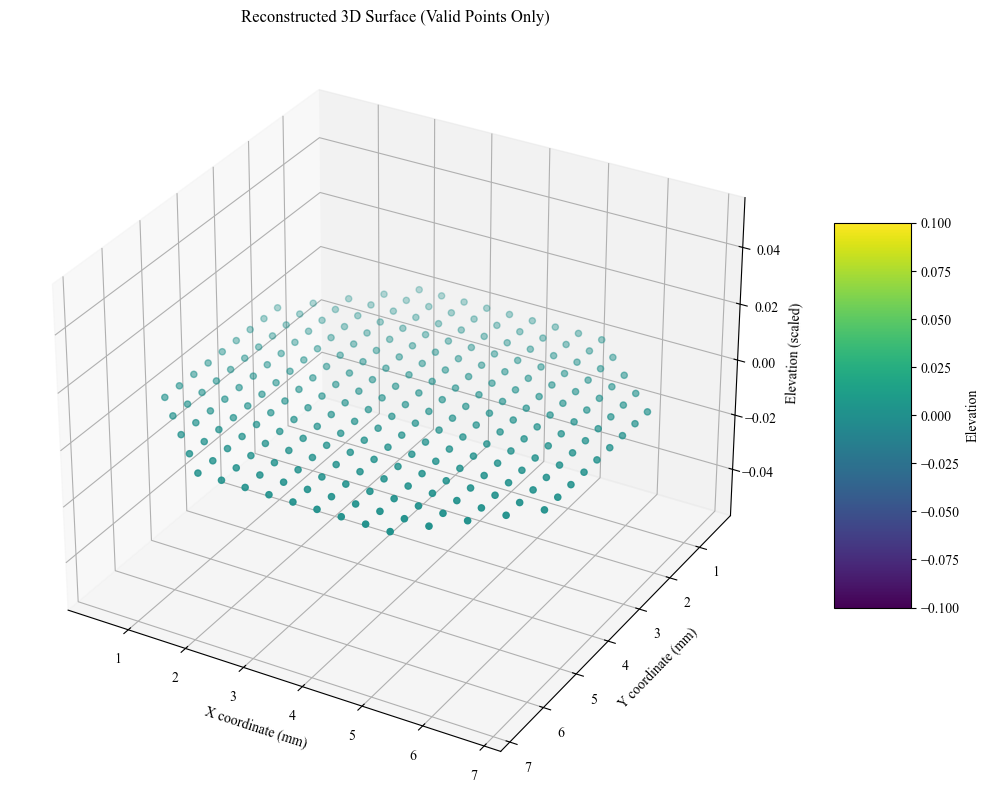

In [ ]:
x_axis = np.arange(0, nc) * p
y_axis = np.arange(0, nr) * p

X, Y = np.meshgrid(x_axis, y_axis)

# --- 2. Flatten ALL Data ---
x_flat = X.flatten()
y_flat = Y.flatten()
z_flat = Z.flatten()
f_flat = f.flatten() # Flatten the 'f' (filled) matrix

mask = f_flat > 0


x_valid = x_flat[mask]
y_valid = y_flat[mask]
z_valid = z_flat[mask]

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.scatter(x_valid, y_valid, z_valid, c= z_valid, cmap='viridis')


ax.invert_xaxis() 

current_xlim = ax.get_xlim()
current_ylim = ax.get_ylim()

# Set the limits in reverse order
ax.set_xlim(current_xlim[1], current_xlim[0])
ax.set_ylim(current_ylim[1], current_ylim[0])

ax.set_xlabel('X coordinate (mm)')
ax.set_ylabel('Y coordinate (mm)')
ax.set_zlabel('Elevation (scaled)') # Added 'scaled'
ax.set_title('Reconstructed 3D Surface (Valid Points Only)')
fig.colorbar(surf, shrink=0.5, aspect=5, label='Elevation')